## Ruta de Acceso a los Datos

In [5]:
# Importación de librerías
# Gestión de archivos y utilidades
import os
import shutil
import logging
import math
import random

In [6]:
# Manipulación y análisis de datos
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1]:
DATASET_PATH = "/Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3"

In [3]:
# Ruta de acceso al dataset
ROOT_DIR = f'{DATASET_PATH}/plantvillage dataset/color'
print(f"ROOT_DIR: {ROOT_DIR}")

ROOT_DIR: /Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color


## Funciones utiles

## Importación de imágenes

In [4]:
# CONFIGURACIÓN INICIAL:
# Separador usado en los nombres de las subcarpetas
SEPARATOR = '___' # Separa entre 'group' y 'class'

# Extensiones de archivo de imagen a considerar (en minúsculas)
IMAGE_EXTENSIONS = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

Esta función está diseñada para procesar una estructura de directorios que contiene imágenes organizadas en subcarpetas y generar un DataFrame de pandas con información detallada sobre cada imagen encontrada.

Dentro de cada subdirectorio, examina todos los archivos y verifica que sean archivos de imagen válidos (basándose en la extensión), calcula la ruta relativa desde el directorio raíz al final almacena toda la información relevante.

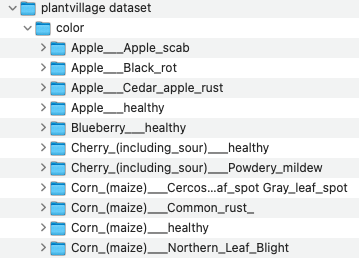

Crea un DataFrame con las siguientes columnas:

* image_path: Ruta relativa al directorio donde está la imagen
* filename: Nombre del archivo de imagen
* class: Clasificación basada en la ruta relativa
* group: Grupo extraído del nombre del subdirectorio
* tag: Etiqueta extraída del nombre del subdirectorio

In [9]:
def process_image_directory(root_directory, folder_separator='___', allowed_extensions=None):
    """
    Recorre un directorio raíz, extrae rutas de imágenes y metadatos de subcarpetas.

    Args:
        root_directory (str): La ruta al directorio raíz que contiene las subcarpetas de clases.
        folder_separator (str): El separador utilizado en los nombres de las subcarpetas
                               para dividir 'group' y 'tag'.
        allowed_extensions (set, optional): Un conjunto de extensiones de archivo (en minúsculas,
                                          incluyendo el punto) a considerar como imágenes.
                                          Si es None, se usará un conjunto predeterminado.

    Returns:
        pandas.DataFrame: Un DataFrame con las columnas 'image_path', 'filename', 'class', 'group', 'tag'.
                          Retorna un DataFrame vacío si el directorio raíz no existe o
                          no se encuentran imágenes válidas.
    """
    # Configuración de extensiones válidas por defecto
    if allowed_extensions is None:
        allowed_extensions = IMAGE_EXTENSIONS
    
    # Inicialización de variables
    image_data = []
    dataframe_columns = ['image_path', 'filename', 'class', 'group', 'tag']
    
    # Verificación de existencia del directorio
    if not os.path.isdir(root_directory):
        logging.error(f"El directorio raíz especificado no existe: {root_directory}")
        return pd.DataFrame(image_data, columns=dataframe_columns)
    
    logging.info(f"Comenzando el procesamiento del directorio: {root_directory}")
    
    # Procesamiento de cada subdirectorio
    for directory_entry in os.scandir(root_directory):
        if not directory_entry.is_dir():
            continue
            
        subdirectory_name = directory_entry.name
        subdirectory_path = directory_entry.path
        logging.info(f"Procesando subdirectorio: {subdirectory_name}")
        
        # Verificación del separador en el nombre del subdirectorio
        if folder_separator not in subdirectory_name:
            logging.warning(f"El nombre del subdirectorio '{subdirectory_name}' no contiene el separador '{folder_separator}'. Saltando.")
            continue
        
        # Extracción de group y tag del nombre del subdirectorio
        try:
            group_name, tag_name = subdirectory_name.split(folder_separator, 1)
        except ValueError:
            logging.warning(f"No se pudo dividir el nombre '{subdirectory_name}' usando '{folder_separator}'. Saltando directorio.")
            continue
        
        # Procesamiento de archivos dentro del subdirectorio
        for file_entry in os.scandir(subdirectory_path):
            if not file_entry.is_file():
                continue
                
            current_filename = file_entry.name
            current_filepath = file_entry.path
            
            # Verificación de extensión válida
            _, file_extension = os.path.splitext(current_filename)
            if file_extension.lower() not in allowed_extensions:
                logging.debug(f"Archivo omitido (no es imagen válida): {current_filepath}")
                continue
            
            # Cálculo de la ruta relativa y almacenamiento de datos
            relative_directory_path = os.path.relpath(os.path.dirname(current_filepath), root_directory)
            
            image_data.append({
                'image_path': f"{relative_directory_path}/",
                'filename': current_filename,
                'class': relative_directory_path,
                'group': group_name,
                'tag': tag_name
            })
    
    # Verificación de resultados y construcción del DataFrame
    if not image_data:
        logging.warning("No se encontraron imágenes válidas en la estructura de directorios especificada.")
    
    result_dataframe = pd.DataFrame(image_data, columns=dataframe_columns)
    logging.info(f"Proceso completado. Se encontraron {len(result_dataframe)} imágenes.")
    
    return result_dataframe

In [11]:
df = process_image_directory(ROOT_DIR, SEPARATOR, IMAGE_EXTENSIONS)
df.sample(10)

image_path  \
8836                            Tomato___Late_blight/   
27672                               Tomato___healthy/   
53346                              Soybean___healthy/   
30161         Tomato___Tomato_Yellow_Leaf_Curl_Virus/   
35913            Corn_(maize)___Northern_Leaf_Blight/   
24292                    Corn_(maize)___Common_rust_/   
37384  Tomato___Spider_mites Two-spotted_spider_mite/   
20526                       Apple___Cedar_apple_rust/   
1971                           Potato___Early_blight/   
33074         Tomato___Tomato_Yellow_Leaf_Curl_Virus/   

                                                filename  \
8836   1d83eef4-92a0-42a2-9ea7-1ec2e683dbc0___GHLB2 L...   
27672  e33cde2d-5103-48aa-bb82-490aa779312c___GH_HL L...   
53346  f3a0482e-d5cb-4c58-9ee1-6c4a61f828ac___RS_HL 6...   
30161  18d740ae-e2cc-40cf-8c03-530a8f2dc4cb___YLCV_GC...   
35913  b34cc20b-1efb-4df2-bb33-6005963eaedf___RS_NLB ...   
24292                                   RS_Rust 2081.JPG   
37384  c9f90de8-89ec-4a39-a117-30c89006a204___Com.G_S...   
20526  848e865c-bdbb-41eb-a4d1-90f1d49d1d74___FREC_C....   
1971   2cce6cd6-16c4-426f-84e6-2f3c192fac2c___RS_Earl...   
33074  bd8dade5-7c82-40ad-b12f-9dcc1e394e76___UF.GRC_...   

                                               class         group  \
8836                            Tomato___Late_blight        Tomato   
27672                               Tomato___healthy        Tomato   
53346                              Soybean___healthy       Soybean   
30161         Tomato___Tomato_Yellow_Leaf_Curl_Virus        Tomato   
35913            Corn_(maize)___Northern_Leaf_Blight  Corn_(maize)   
24292                    Corn_(maize)___Common_rust_  Corn_(maize)   
37384  Tomato___Spider_mites Two-spotted_spider_mite        Tomato   
20526                       Apple___Cedar_apple_rust         Apple   
1971                           Potato___Early_blight        Potato   
33074         Tomato___Tomato_Yellow_Leaf_Curl_Virus        Tomato   

                                        tag  
8836                            Late_blight  
27672                               healthy  
53346                               healthy  
30161         Tomato_Yellow_Leaf_Curl_Virus  
35913                  Northern_Leaf_Blight  
24292                          Common_rust_  
37384  Spider_mites Two-spotted_spider_mite  
20526                      Cedar_apple_rust  
1971                           Early_blight  
33074         Tomato_Yellow_Leaf_Curl_Virus

In [15]:
# Mueve el índice a una columna 'id' para poder tener un control de los datos durante el proceso de ETL
df = df.reset_index(names='id')

# Define la columna 'id' como index
df = df.set_index('id')

df.sample(5)

image_path  \
id                                                 
8384                       Tomato___Late_blight/   
19658  Cherry_(including_sour)___Powdery_mildew/   
38480                    Peach___Bacterial_spot/   
49730                         Soybean___healthy/   
48951                  Strawberry___Leaf_scorch/   

                                                filename  \
id                                                         
8384   cedebb08-bf5c-434a-931e-63ce9621b77e___GHLB2 L...   
19658  a21fb672-e50e-40eb-9141-17a084f6e5ef___FREC_Pw...   
38480  cb245596-e439-4fb8-ae1a-ddef3d537804___Rut._Ba...   
49730  f53cc625-3abb-47fd-8d27-ce9ac805a62f___RS_HL 7...   
48951  064044ca-4bb3-485f-80a5-9cea1b26d453___RS_L.Sc...   

                                          class                    group  \
id                                                                         
8384                       Tomato___Late_blight                   Tomato   
19658  Cherry_(including_sour)___Powdery_mildew  Cherry_(including_sour)   
38480                    Peach___Bacterial_spot                    Peach   
49730                         Soybean___healthy                  Soybean   
48951                  Strawberry___Leaf_scorch               Strawberry   

                  tag  
id                     
8384      Late_blight  
19658  Powdery_mildew  
38480  Bacterial_spot  
49730         healthy  
48951     Leaf_scorch

In [16]:
# Guardamos el dataframe como .CSV para evitar realizar este proceso nuevamente
df.to_csv('dataframe.csv')

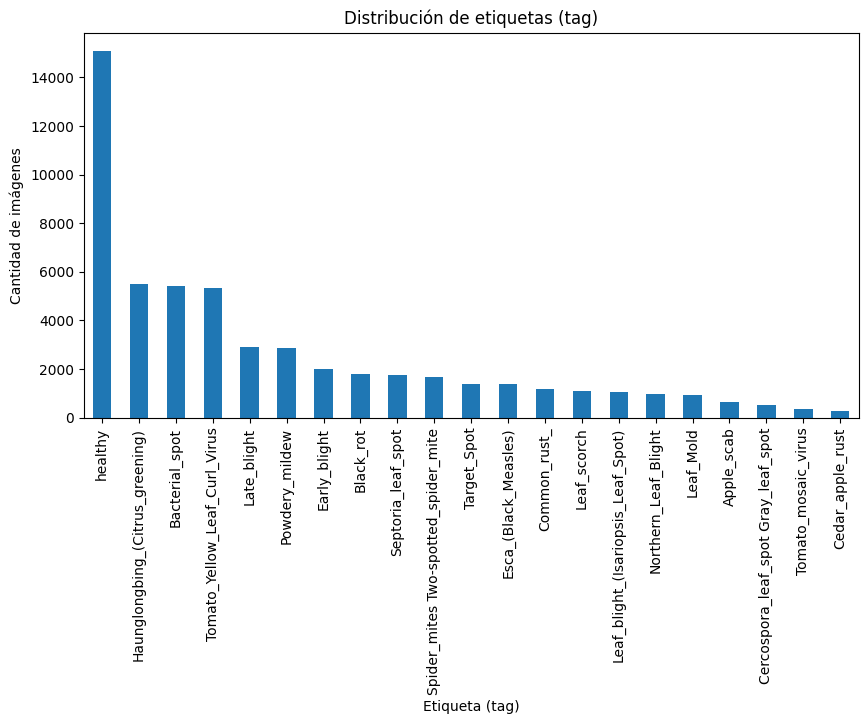

In [14]:
df['tag'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribución de etiquetas (tag)')
plt.xlabel('Etiqueta (tag)')
plt.ylabel('Cantidad de imágenes')
plt.show()

In [17]:
# Verificamos la importación
df.sample(5)

image_path  \
id                                    
44131      Squash___Powdery_mildew/   
39476       Peach___Bacterial_spot/   
41628  Tomato___Septoria_leaf_spot/   
23661        Tomato___Early_blight/   
11609       Pepper,_bell___healthy/   

                                                filename  \
id                                                         
44131  c556ad9e-d84f-4d18-a4c8-681acb283999___UMD_Pow...   
39476  9cc7b9c1-b225-44db-84a5-a910598bf56e___Rutg._B...   
41628  e65190f0-97e9-44a6-bcb8-9fe7d42e9200___Matt.S_...   
23661  04ddbde3-d33c-42bf-b849-dad24d64fd6f___RS_Erly...   
11609  83825263-0e8f-4e27-a6e2-b432323efe49___JR_HL 7...   

                             class         group                 tag  
id                                                                    
44131      Squash___Powdery_mildew        Squash      Powdery_mildew  
39476       Peach___Bacterial_spot         Peach      Bacterial_spot  
41628  Tomato___Septoria_leaf_spot        Tomato  Septoria_leaf_spot  
23661        Tomato___Early_blight        Tomato        Early_blight  
11609       Pepper,_bell___healthy  Pepper,_bell             healthy

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54305 entries, 0 to 54304
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  54305 non-null  object
 1   filename    54305 non-null  object
 2   class       54305 non-null  object
 3   group       54305 non-null  object
 4   tag         54305 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [19]:
df.describe()

image_path  \
count                                       54305   
unique                                         38   
top     Orange___Haunglongbing_(Citrus_greening)/   
freq                                         5507   

                                                 filename  \
count                                               54305   
unique                                              54305   
top     8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1...   
freq                                                    1   

                                           class   group      tag  
count                                      54305   54305    54305  
unique                                        38      14       21  
top     Orange___Haunglongbing_(Citrus_greening)  Tomato  healthy  
freq                                        5507   18160    15084

In [21]:
# Carga de imagenes en memoria y visualización
def load_image(data: pd.DataFrame, index: int, root: str):
    """
    Carga una imagen PIL desde una fila específica de un DataFrame.

    Args:
        dataframe (pandas.DataFrame): El DataFrame que contiene las rutas de las imágenes.
        index (int): El índice de la fila en el DataFrame para cargar la imagen.
        root_dir (str): El directorio raíz donde se encuentran las imágenes.

    Returns:
        PIL.Image.Image: La imagen cargada como un objeto PIL.Image, o None si ocurre un error.
    """

    # if index < 0 or index >= len(data):
    #     print("Índice fuera de rango.")
    #     return None

    row = data.iloc[index]
    relative_path = row['image_path']
    filename = row['filename']
    full_path = os.path.join(root, relative_path, filename)

    try:
        img = Image.open(full_path)
        return img
    except FileNotFoundError:
        print(f"Archivo no encontrado: {full_path}")
        return None
    except Exception as e:
        print(f"Error al cargar la imagen: {e}")
        return None

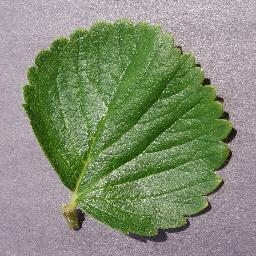

In [22]:
# Permite visualizar una imagen específica (con iloc)
id = 0 # Indice de la imagen a cargar
image = load_image(data=df, index=id, root=ROOT_DIR)

#image.show() #popup option
image

Visualizando 10 imágenes aleatorias:
Imagen #1 (Índice: 35687):


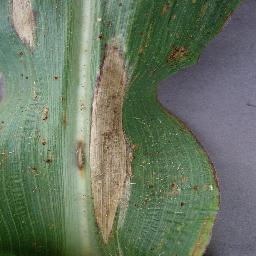

Imagen #2 (Índice: 14617):


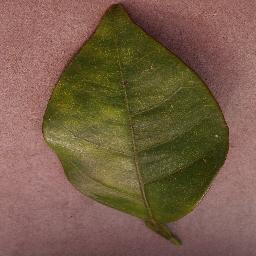

Imagen #3 (Índice: 36658):


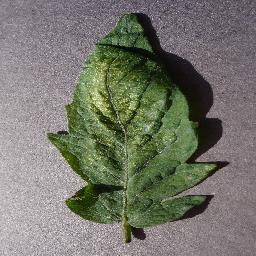

Imagen #4 (Índice: 4279):


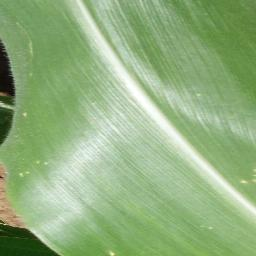

Imagen #5 (Índice: 19355):


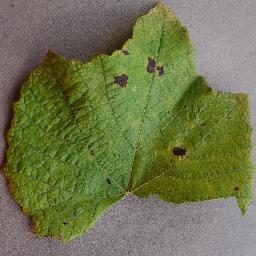

Imagen #6 (Índice: 4295):


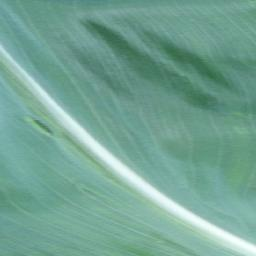

Imagen #7 (Índice: 16769):


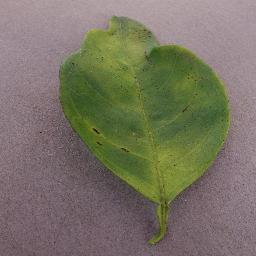

Imagen #8 (Índice: 49267):


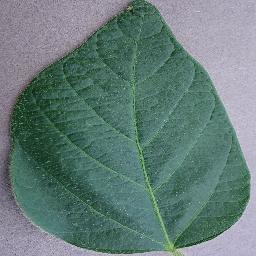

Imagen #9 (Índice: 1407):


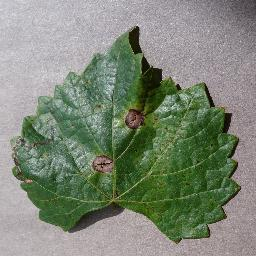

Imagen #10 (Índice: 8827):


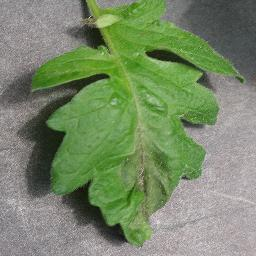

In [23]:
# Obtener 10 índices aleatorios del DataFrame
num_to_display = 10
random_indices = random.sample(range(len(df)), num_to_display)

print(f"Visualizando {num_to_display} imágenes aleatorias:")
for i, index in enumerate(random_indices):
    try:
        image = load_image(data=df, index=index, root=ROOT_DIR)
        print(f"Imagen #{i+1} (Índice: {index}):")
        display(image) # Muestra la imagen directamente en entornos como Jupyter Notebook
    except FileNotFoundError:
        print(f"Error: No se encontró la imagen en la ruta: {os.path.join(ROOT_DIR, df.loc[index, 'relative_path'])}")
    except Exception as e:
        print(f"Error al cargar la imagen en el índice {index}: {e}")

In [27]:
import seaborn as sns

In [28]:
def plot_distribution(df, field, plot_type='bar', top_n=None, filter_by=None, ax=None, **kwargs):
    """
    Plots the distribution of values in a given field from a DataFrame on a given Axes object.

    Parameters:
    - df: pandas DataFrame
    - field: column name to group by (e.g., 'class', 'group', 'tag')
    - plot_type: 'bar' for bar chart, 'pie' for pie chart (default: 'bar')
    - top_n: if specified, shows only top N most frequent values
    - filter_by: dict to filter rows before plotting. Example: {'group': 'Tomato'}
    - ax: matplotlib Axes object to plot on. If None, a new figure and axes are created.
    - **kwargs: additional keyword arguments passed to matplotlib or seaborn plotting functions.
               For example, `autopct='%1.1f%%'` for pie charts, `palette` for both.
    """
    filtered_df = df.copy()

    # Apply filtering if specified
    if filter_by:
        for key, value in filter_by.items():
            filtered_df = filtered_df[filtered_df[key] == value]

    # Get value counts for the selected field
    value_counts = filtered_df[field].value_counts()

    if top_n:
        value_counts = value_counts.head(top_n)

    title_suffix = f" (filtered: {filter_by})" if filter_by else ""

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    if plot_type == 'bar':
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=kwargs.get('palette', "viridis"))
        ax.set_title(f'Distribution per {field}{title_suffix}', fontsize=14)
        ax.set_xlabel(field, fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.tick_params(axis='x', rotation=45, labelsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), ha='right') # Set horizontal alignment here
        ax.tick_params(axis='y', labelsize=12)
    elif plot_type == 'pie':
        ax.pie(value_counts, labels=value_counts.index, startangle=140, **kwargs)
        ax.set_title(f'Distribution of {field}{title_suffix}', fontsize=14)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    else:
        raise ValueError(f"Invalid plot_type: '{plot_type}'. Choose 'bar' or 'pie'.")

    if ax is None:
        plt.tight_layout()
        plt.show()

def plot_density_distribution(df, target):
    df_graph = df.copy()

    # Calculate value counts and order them
    ordered_classes = df_graph[target].value_counts().index

    # Map categorical target values to numeric indices
    df_graph['numeric_target'] = df_graph[target].map({cls: idx for idx, cls in enumerate(ordered_classes)})

    plt.figure(figsize=(15, 10))

    sns.histplot(data=df_graph, x='numeric_target', hue='numeric_target', discrete=True, stat='density', label='Histogram', palette="viridis", legend=False)
    sns.kdeplot(data=df_graph, x='numeric_target', label='Density Plot', color='orange', linewidth=2)
    plt.xticks(ticks=range(len(ordered_classes)), labels=ordered_classes, rotation=45, ha='right', va='top')
    plt.title(f"Histogram and Density plot of '{target}' distribution")
    plt.xlabel("")
    plt.ylabel("Density")
    plt.legend(labels=["Histogram", "Density Plot"])

    plt.tight_layout()
    plt.show()

In [30]:
import warnings
warnings.filterwarnings('ignore')

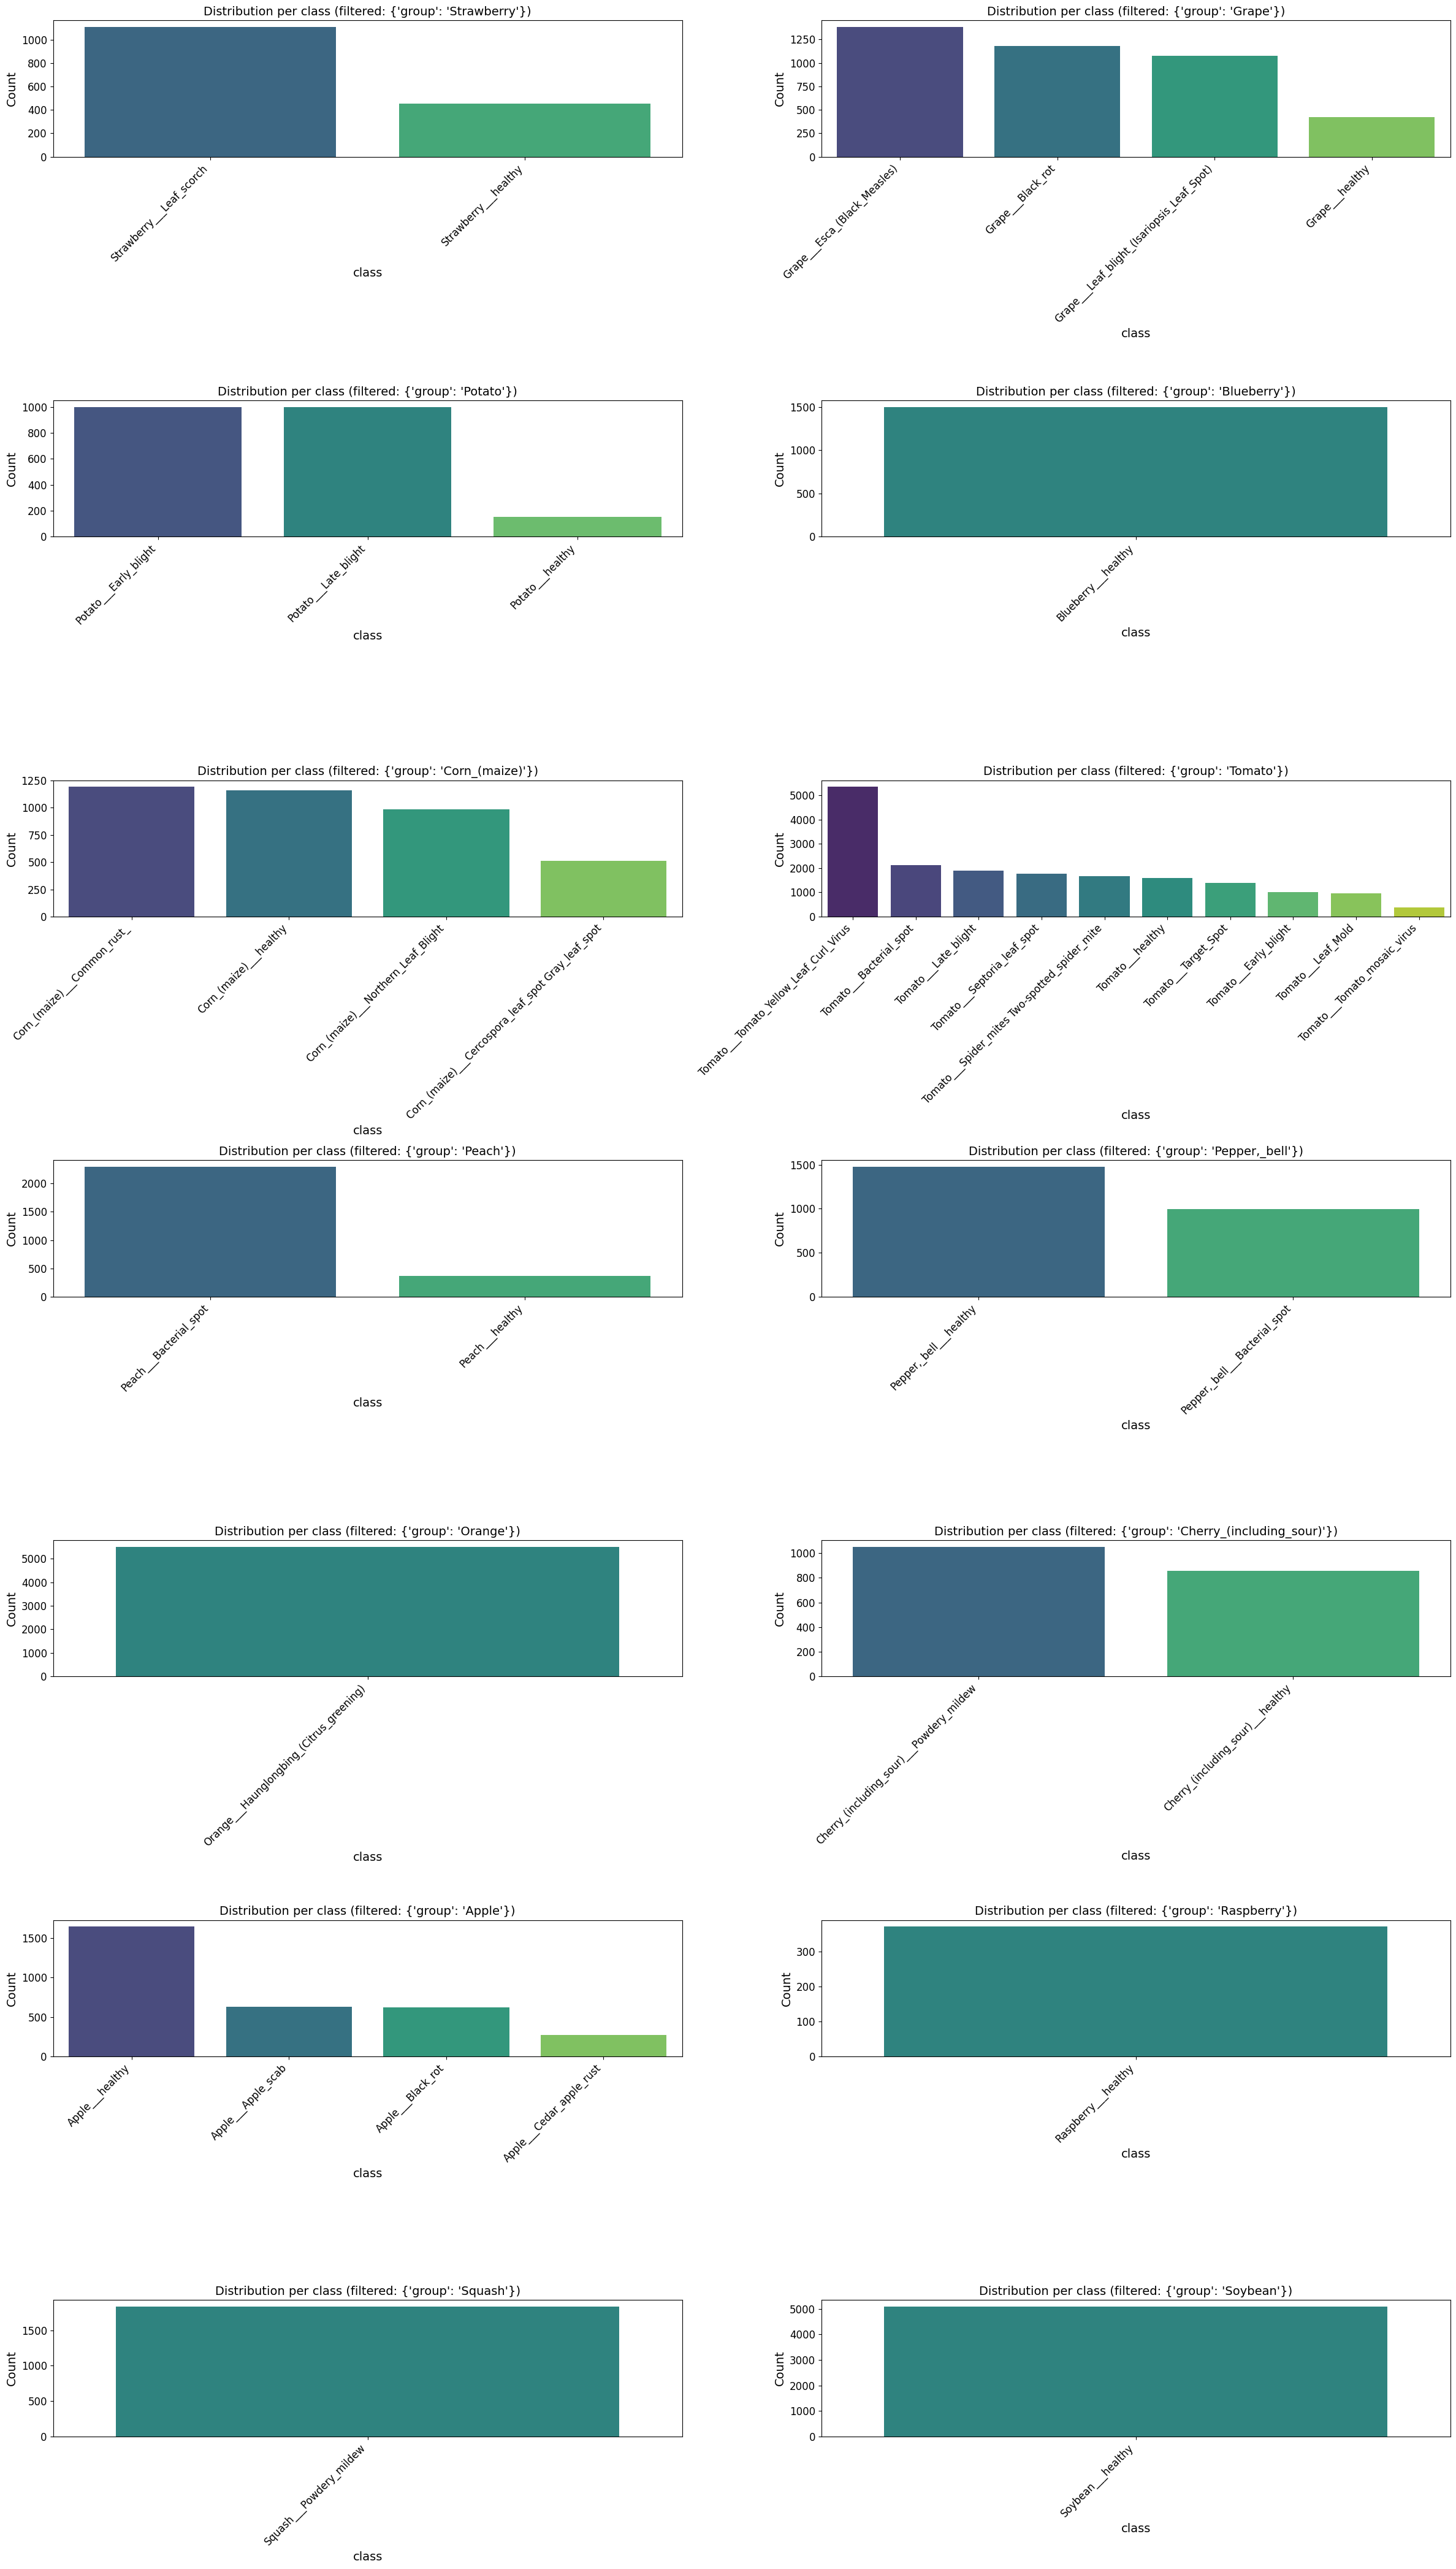

In [31]:
# Implementing grid logic outside the function:
unique_groups = df['group'].unique()
num_groups = len(unique_groups)
grid_cols = 2
num_rows = math.ceil(num_groups / grid_cols)
fig, axes = plt.subplots(num_rows, grid_cols, figsize=(12 * grid_cols, 6 * num_rows))
axes = axes.flatten() # Flatten the axes array for easy indexing
for i, group in enumerate(unique_groups):
    if i < len(axes):
        plot_distribution(df, field='class', filter_by={'group': group},
                          ax=axes[i], plot_type='bar')

# Hide any unused subplots
for j in range(num_groups, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [32]:
### Resumen distribucion por grupo
print("Conteo por grupo:")
print(df['group'].value_counts())

Conteo por grupo:
group
Tomato                     18160
Orange                      5507
Soybean                     5090
Grape                       4062
Corn_(maize)                3852
Apple                       3171
Peach                       2657
Pepper,_bell                2475
Potato                      2152
Cherry_(including_sour)     1906
Squash                      1835
Strawberry                  1565
Blueberry                   1502
Raspberry                    371
Name: count, dtype: int64


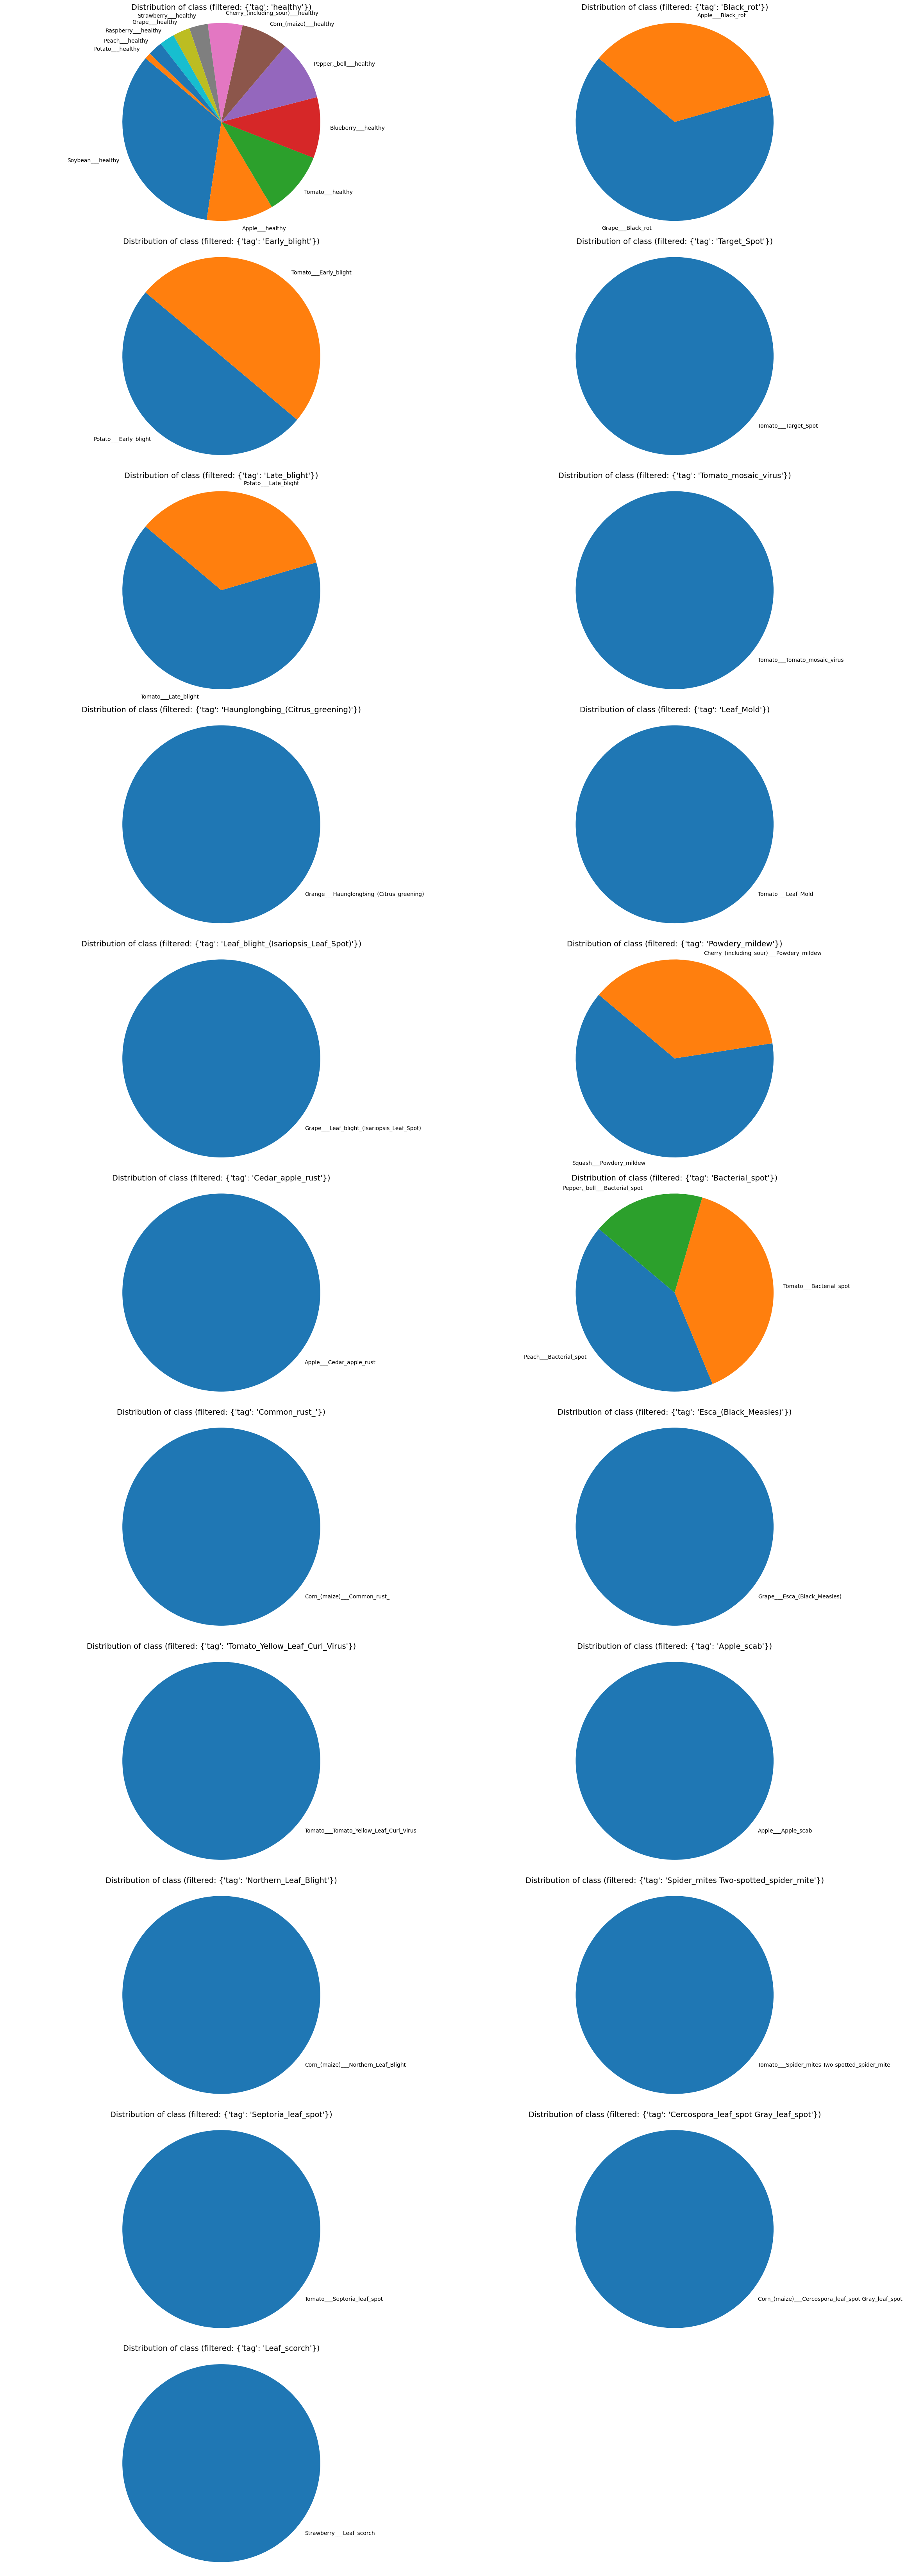

In [33]:
# Implementing grid logic outside the function:
unique_tags = df['tag'].unique()
num_tags = len(unique_tags)
grid_cols = 2
num_rows = math.ceil(num_tags / grid_cols)
fig, axes = plt.subplots(num_rows, grid_cols, figsize=(12 * grid_cols, 6 * num_rows))
axes = axes.flatten() # Flatten the axes array for easy indexing
for i, tag in enumerate(unique_tags):
    if i < len(axes):
        plot_distribution(df, field='class', filter_by={'tag': tag},
                          ax=axes[i], plot_type='pie')

# Hide any unused subplots
for j in range(num_tags, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [34]:
## Resumen distribucion por enfermedad
print("Conteo por enfermedad:")
print(df['tag'].value_counts())

Conteo por enfermedad:
tag
healthy                                 15084
Haunglongbing_(Citrus_greening)          5507
Bacterial_spot                           5421
Tomato_Yellow_Leaf_Curl_Virus            5357
Late_blight                              2909
Powdery_mildew                           2887
Early_blight                             2000
Black_rot                                1801
Septoria_leaf_spot                       1771
Spider_mites Two-spotted_spider_mite     1676
Target_Spot                              1404
Esca_(Black_Measles)                     1383
Common_rust_                             1192
Leaf_scorch                              1109
Leaf_blight_(Isariopsis_Leaf_Spot)       1076
Northern_Leaf_Blight                      985
Leaf_Mold                                 952
Apple_scab                                630
Cercospora_leaf_spot Gray_leaf_spot       513
Tomato_mosaic_virus                       373
Cedar_apple_rust                          275
Name: c

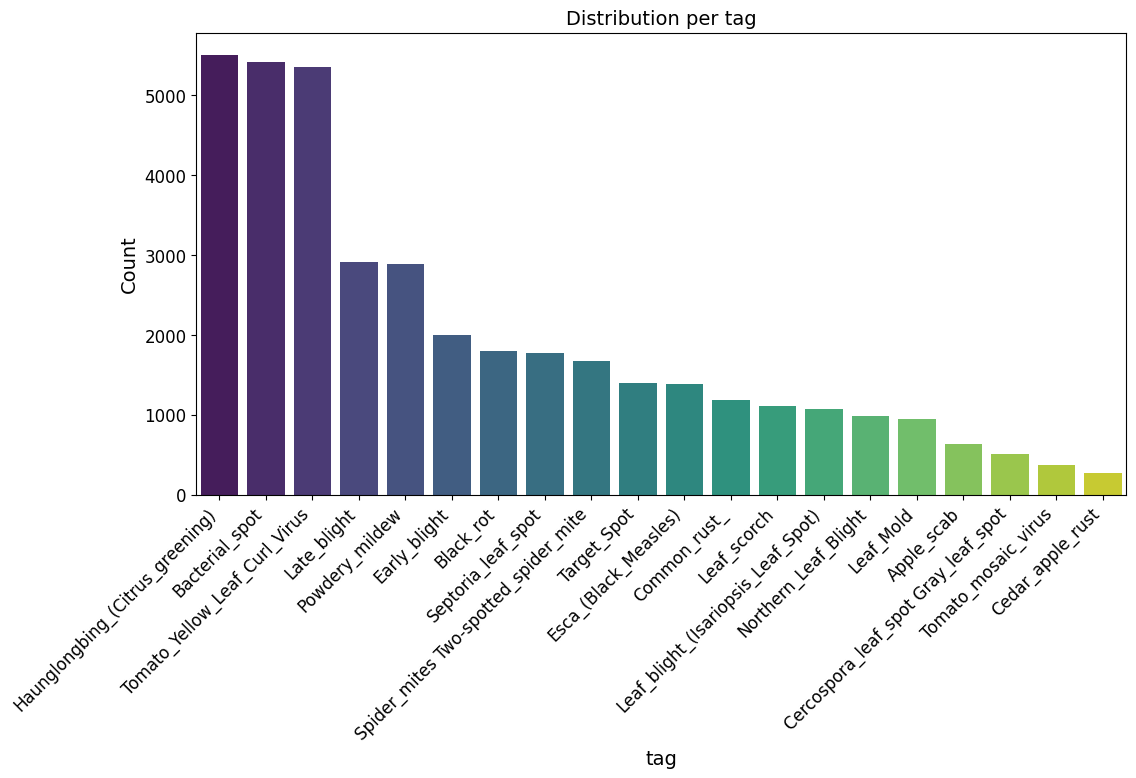

In [35]:
# we execute plot_distribution grouping by tag, iterating throguh all the tags
plot_distribution(df[df['tag'] != 'healthy'], field='tag', top_n=40)

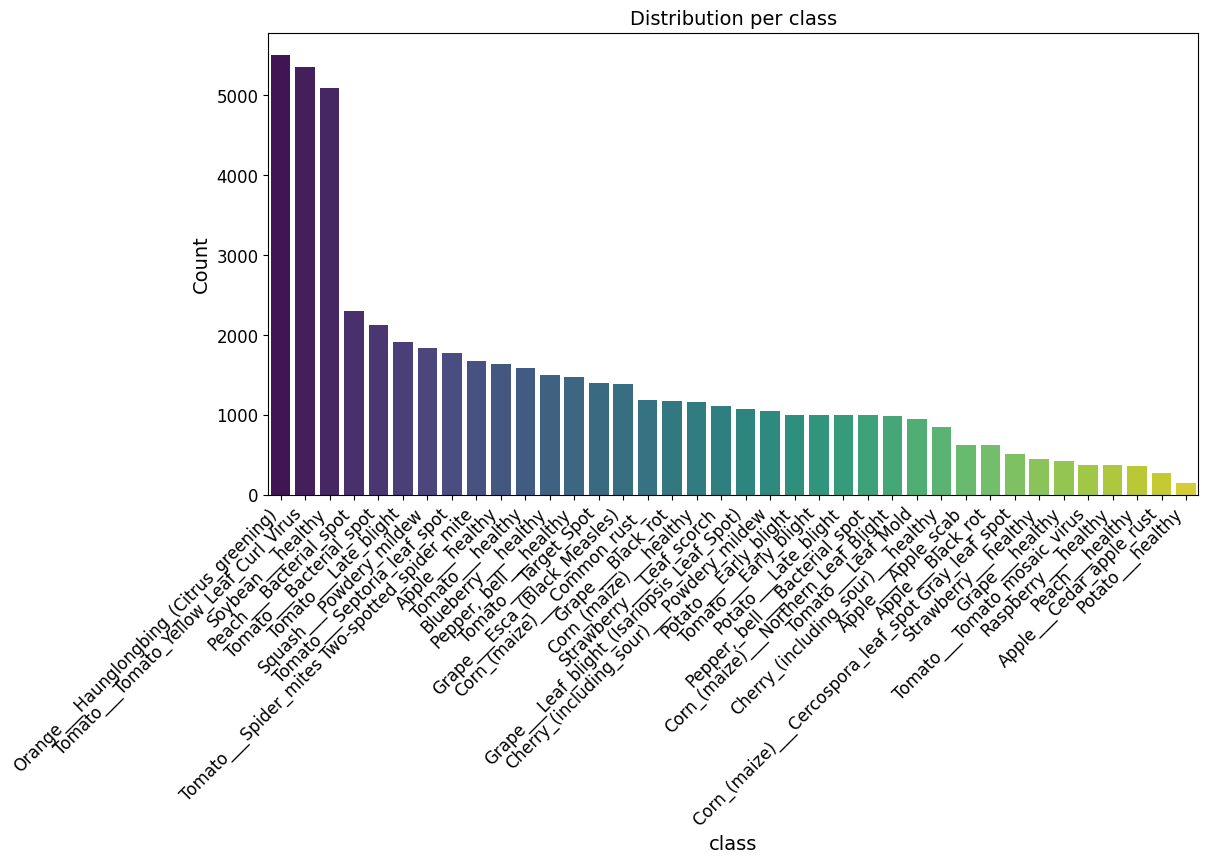

In [36]:
# now using the previous function we plot th edistribution by class , group and tag
plot_distribution(df, field='class', top_n=40)

In [37]:
## Distribución entre clases
print("Conteo por grupo:")
print(df['class'].value_counts())

Conteo por grupo:
class
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1478
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                          1383
Corn_(maize)___Common_rust_                           1192
Grape___Black_rot               

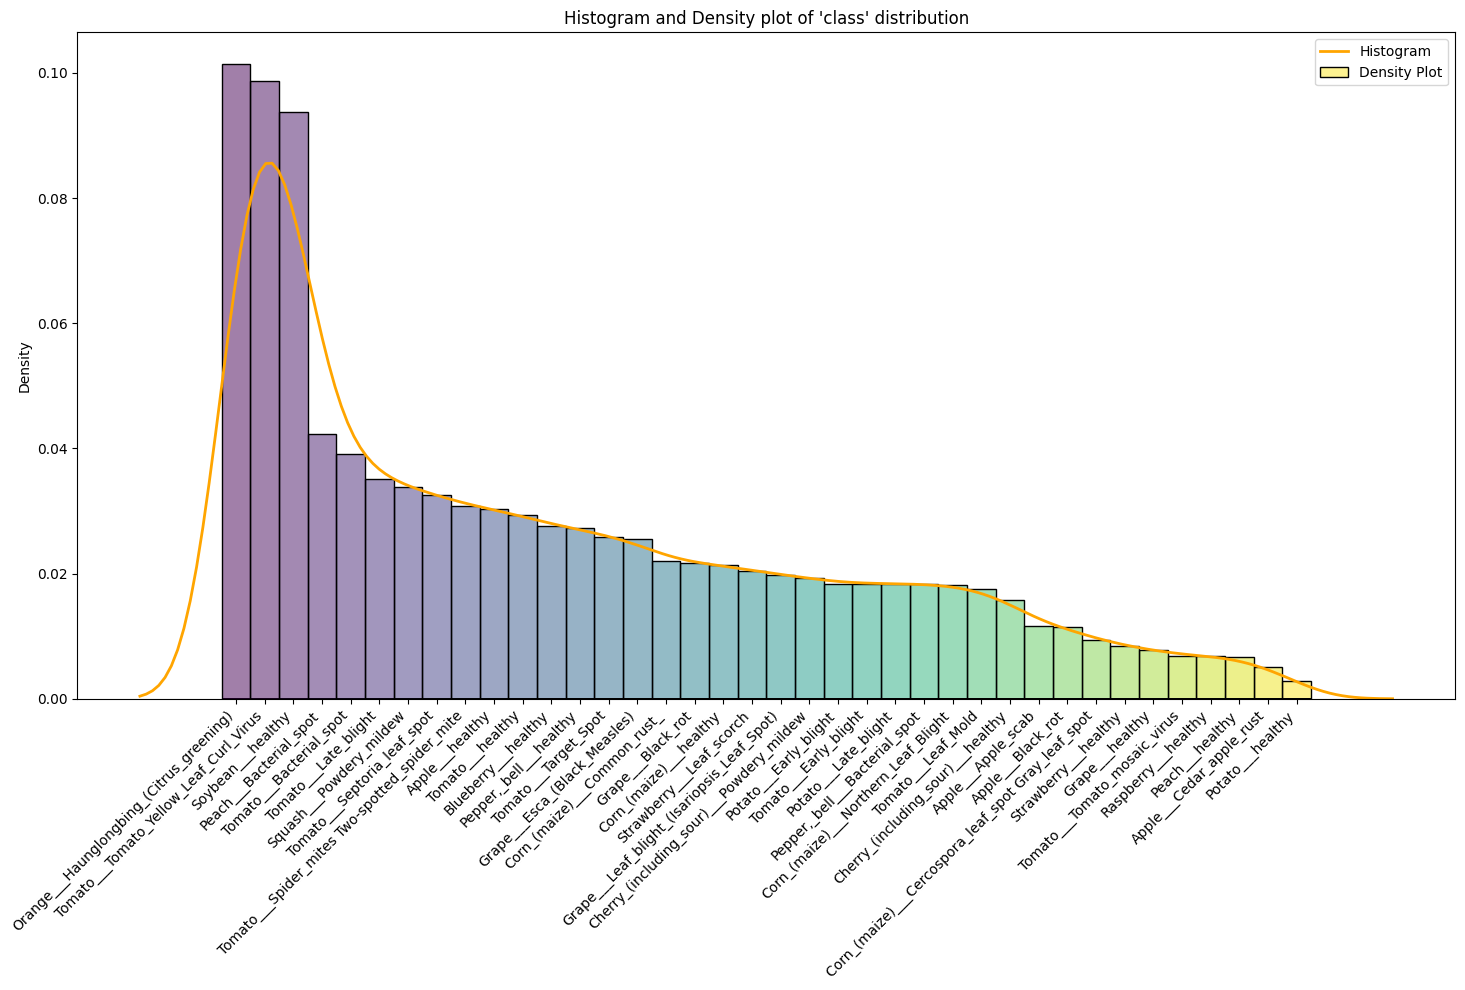

In [38]:
plot_density_distribution(df, target='class')

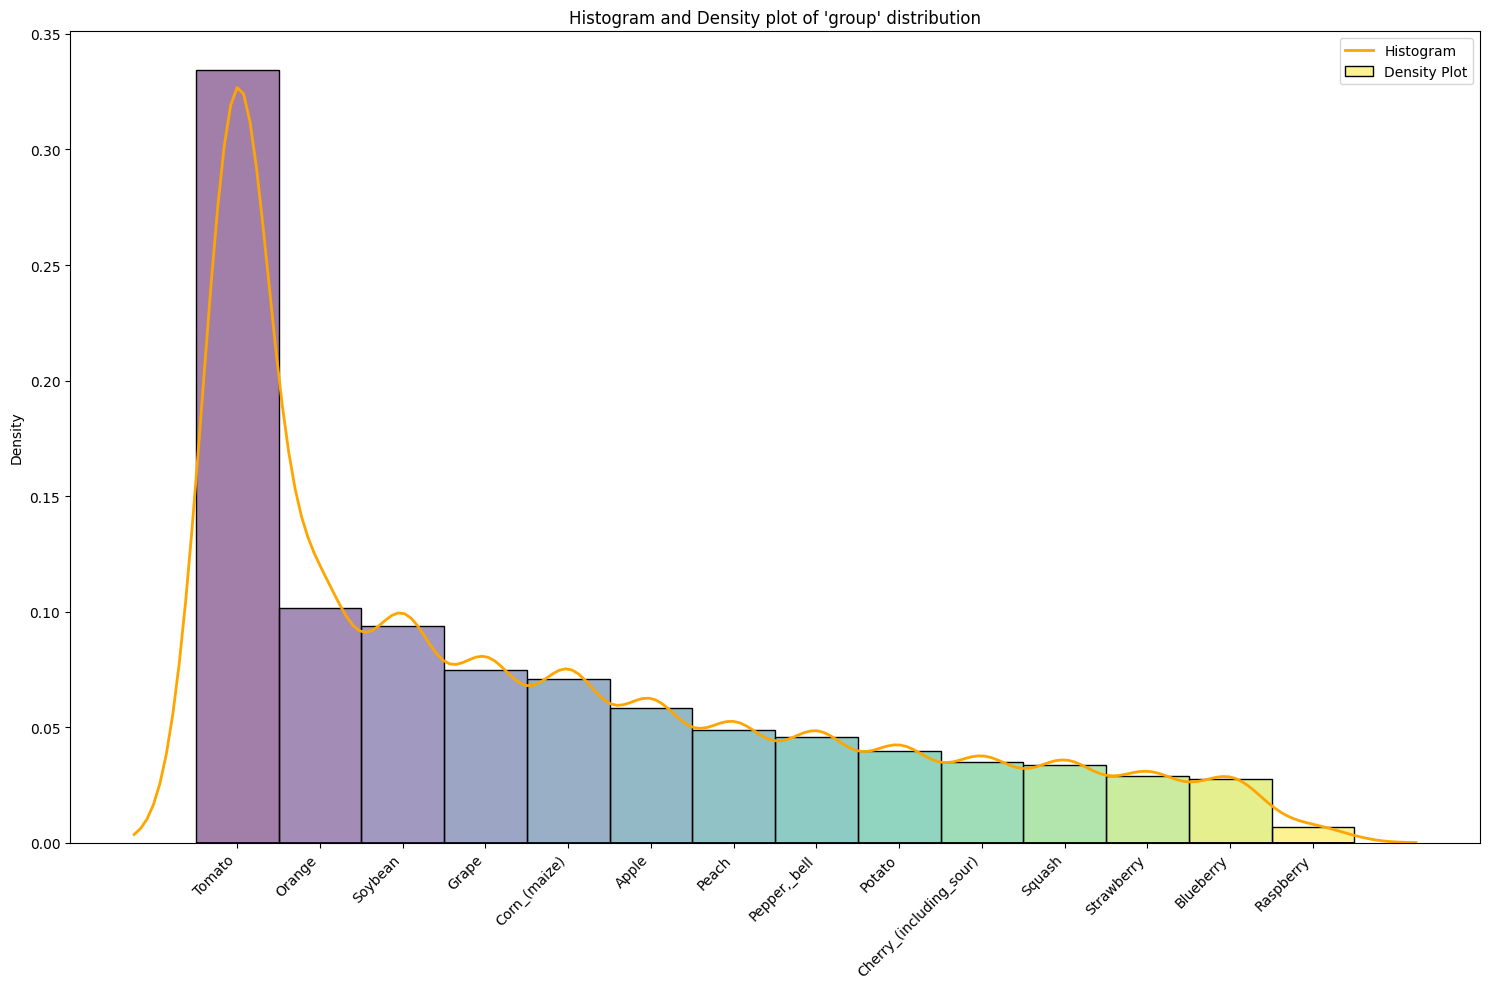

In [39]:
plot_density_distribution(df, target='group')

## Firmas espectrales en RGB

In [44]:
df.sample(5)

image_path  \
id                                                         
48376                          Strawberry___Leaf_scorch/   
45664  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   
29831            Tomato___Tomato_Yellow_Leaf_Curl_Virus/   
27312                                  Tomato___healthy/   
43906                           Squash___Powdery_mildew/   

                                                filename  \
id                                                         
48376  167092ad-3447-4720-8c84-1f7fd5b25e7e___RS_L.Sc...   
45664  06e94cd0-fe77-4af0-b4ae-664fcd78cfff___RS_GLSp...   
29831  143d243b-b214-4998-9c9a-d35bddf3a943___UF.GRC_...   
27312  0e1d7722-3df9-4a3a-a4e2-bc0ea3ce0da4___RS_HL 9...   
43906  1578809f-6d53-4944-b603-1010e7802458___UMD_Pow...   

                                                   class         group  \
id                                                                       
48376                           Strawberry___Leaf_scorch    Strawberry   
45664  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  Corn_(maize)   
29831             Tomato___Tomato_Yellow_Leaf_Curl_Virus        Tomato   
27312                                   Tomato___healthy        Tomato   
43906                            Squash___Powdery_mildew        Squash   

                                       tag  
id                                          
48376                          Leaf_scorch  
45664  Cercospora_leaf_spot Gray_leaf_spot  
29831        Tomato_Yellow_Leaf_Curl_Virus  
27312                              healthy  
43906                       Powdery_mildew

In [48]:
def compute_average_rgb_histograms(df: pd.DataFrame, root_dir: str, bins: int = 256, max_images_per_group_tag: int = None):
    """
    Calcula el histograma promedio por canal RGB para cada combinación única de (group, tag).

    Args:
        df (pd.DataFrame): DataFrame que contiene las columnas 'image_path', 'filename', 'group', 'tag'.
        root_dir (str): Directorio raíz donde están almacenadas las imágenes.
        bins (int): Número de bins para el histograma (por defecto 256).
        max_images_per_group_tag (int): Máximo de imágenes a procesar por grupo/tag. Si None, se procesan todas.

    Returns:
        pd.DataFrame: Un DataFrame con las columnas [group, tag, bin, r, g, b].
    """
    from collections import defaultdict
    import numpy as np
    from PIL import Image
    import os

    def load_image(row, root):
        full_path = os.path.join(root, row['image_path'], row['filename'])
        try:
            return Image.open(full_path).convert("RGB")
        except Exception:
            return None

    def calculate_rgb_histogram(image, bins):
        arr = np.array(image)
        hist_r, _ = np.histogram(arr[:, :, 0], bins=bins, range=(0, 256))
        hist_g, _ = np.histogram(arr[:, :, 1], bins=bins, range=(0, 256))
        hist_b, _ = np.histogram(arr[:, :, 2], bins=bins, range=(0, 256))
        return hist_r, hist_g, hist_b

    grouped = df.groupby(["group", "tag"])
    histograms = defaultdict(lambda: {'r': [], 'g': [], 'b': []})

    for (group, tag), group_df in grouped:
        count = 0
        for _, row in group_df.iterrows():
            if max_images_per_group_tag and count >= max_images_per_group_tag:
                break
            img = load_image(row, root_dir)
            if img is not None:
                hr, hg, hb = calculate_rgb_histogram(img, bins)
                histograms[(group, tag)]['r'].append(hr)
                histograms[(group, tag)]['g'].append(hg)
                histograms[(group, tag)]['b'].append(hb)
                count += 1

    # Promediar los histogramas
    result_data = []
    for (group, tag), hists in histograms.items():
        r_avg = np.mean(hists['r'], axis=0)
        g_avg = np.mean(hists['g'], axis=0)
        b_avg = np.mean(hists['b'], axis=0)
        for i in range(bins):
            result_data.append({
                "group": group,
                "tag": tag,
                "bin": i,
                "r": r_avg[i],
                "g": g_avg[i],
                "b": b_avg[i],
            })

    return pd.DataFrame(result_data)


In [51]:
df

image_path  \
id                             
0      Strawberry___healthy/   
1      Strawberry___healthy/   
2      Strawberry___healthy/   
3      Strawberry___healthy/   
4      Strawberry___healthy/   
...                      ...   
54300     Soybean___healthy/   
54301     Soybean___healthy/   
54302     Soybean___healthy/   
54303     Soybean___healthy/   
54304     Soybean___healthy/   

                                                filename  \
id                                                         
0      8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1...   
1      b8e9ed27-8e37-4214-9206-f8c0ef21cf4d___RS_HL 4...   
2      abdd34a0-ab02-41e0-95a3-a014ab863ec2___RS_HL 1...   
3      d1aee44a-b6bb-45b9-b7b6-5d553add8fd1___RS_HL 2...   
4      3d28c3ea-8419-4e09-addd-211e3828e39f___RS_HL 1...   
...                                                  ...   
54300  57c18b39-2a33-471f-91eb-a9ba4ddabc7b___RS_HL 6...   
54301  4fdc663e-a8ea-4d8a-801b-ef18ad192661___RS_HL 6...   
54302  df807f13-078b-4a6a-9c23-e43e540ecdc2___RS_HL 5...   
54303  60bf9858-951a-4b56-906e-3c1b336973ba___RS_HL 4...   
54304  c7f4b7b2-b13c-476e-a936-c91ce39749a3___RS_HL 6...   

                      class       group      tag  \
id                                                 
0      Strawberry___healthy  Strawberry  healthy   
1      Strawberry___healthy  Strawberry  healthy   
2      Strawberry___healthy  Strawberry  healthy   
3      Strawberry___healthy  Strawberry  healthy   
4      Strawberry___healthy  Strawberry  healthy   
...                     ...         ...      ...   
54300     Soybean___healthy     Soybean  healthy   
54301     Soybean___healthy     Soybean  healthy   
54302     Soybean___healthy     Soybean  healthy   
54303     Soybean___healthy     Soybean  healthy   
54304     Soybean___healthy     Soybean  healthy   

                                               full_path  
id                                                        
0      Strawberry___healthy/8f558908-aa1b-4a86-855a-5...  
1      Strawberry___healthy/b8e9ed27-8e37-4214-9206-f...  
2      Strawberry___healthy/abdd34a0-ab02-41e0-95a3-a...  
3      Strawberry___healthy/d1aee44a-b6bb-45b9-b7b6-5...  
4      Strawberry___healthy/3d28c3ea-8419-4e09-addd-2...  
...                                                  ...  
54300  Soybean___healthy/57c18b39-2a33-471f-91eb-a9ba...  
54301  Soybean___healthy/4fdc663e-a8ea-4d8a-801b-ef18...  
54302  Soybean___healthy/df807f13-078b-4a6a-9c23-e43e...  
54303  Soybean___healthy/60bf9858-951a-4b56-906e-3c1b...  
54304  Soybean___healthy/c7f4b7b2-b13c-476e-a936-c91c...  

[54305 rows x 6 columns]

In [53]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Paso 1: Definir el path base (verificando cómo se compone la ruta desde el dataframe)
def build_image_path(row):
    return os.path.join(ROOT_DIR, row["image_path"], row["filename"])

df["full_path"] = df.apply(build_image_path, axis=1)

# Paso 3: Agrupar por group y tag
grouped = df.groupby(["group", "tag"])

# Paso 4: Calcular histogramas promedio por grupo y tag
average_histograms = {}

for (group, tag), group_df in grouped:
    hist_r_total = np.zeros(256)
    hist_g_total = np.zeros(256)
    hist_b_total = np.zeros(256)
    count = 0

    for path in group_df["full_path"]:
        try:
            img = Image.open(path).convert("RGB")
            arr = np.array(img)
            hist_r, _ = np.histogram(arr[:, :, 0], bins=256, range=(0, 256))
            hist_g, _ = np.histogram(arr[:, :, 1], bins=256, range=(0, 256))
            hist_b, _ = np.histogram(arr[:, :, 2], bins=256, range=(0, 256))
            hist_r_total += hist_r
            hist_g_total += hist_g
            hist_b_total += hist_b
            count += 1
        except Exception as e:
            continue

    if count > 0:
        avg_r = hist_r_total / count
        avg_g = hist_g_total / count
        avg_b = hist_b_total / count
        average_histograms[(group, tag)] = (avg_r, avg_g, avg_b)

In [54]:
average_histograms

{('Apple',
  'Apple_scab'): (array([ 17.52857143,   5.35555556,   5.32539683,   7.65238095,
           8.99047619,  10.51111111,  13.56825397,  16.98095238,
          21.8       ,  28.04603175,  43.82222222,  55.68730159,
          68.15555556,  82.1015873 , 102.85079365, 124.50793651,
         143.75555556, 145.56507937, 144.07460317, 144.83492063,
         147.04444444, 153.24920635, 160.29365079, 166.04761905,
         172.47301587, 177.41904762, 183.16507937, 191.36507937,
         198.52380952, 202.93809524, 208.33650794, 213.46031746,
         217.96190476, 225.21269841, 234.14444444, 243.85714286,
         250.73333333, 260.36031746, 269.23968254, 278.7952381 ,
         286.0015873 , 296.4015873 , 303.07619048, 311.02698413,
         316.11904762, 323.45873016, 333.05079365, 340.18571429,
         346.75396825, 355.02698413, 362.7047619 , 371.74761905,
         379.26825397, 384.93968254, 392.63968254, 399.62698413,
         404.7015873 , 411.24603175, 416.88412698, 420.33968254

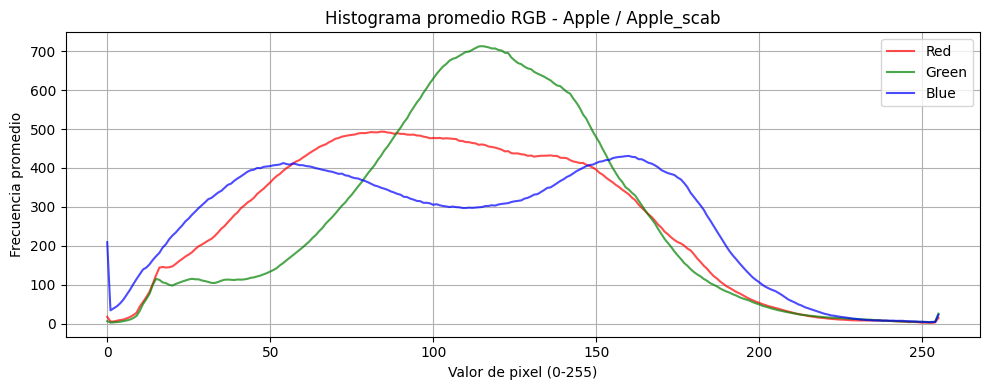

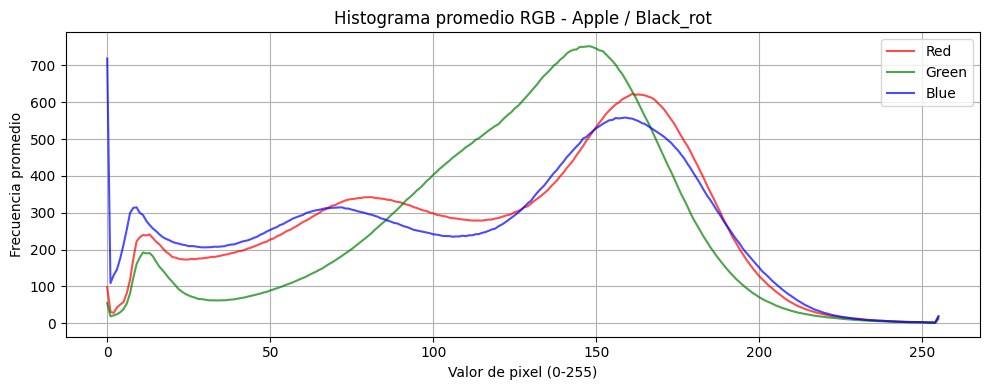

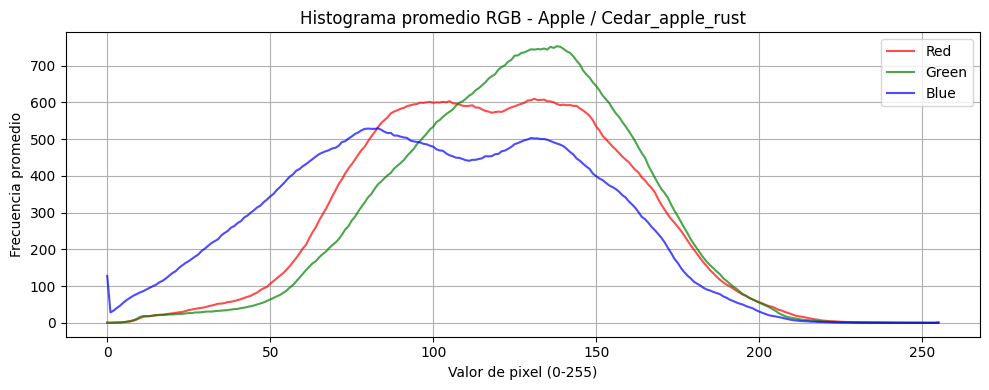

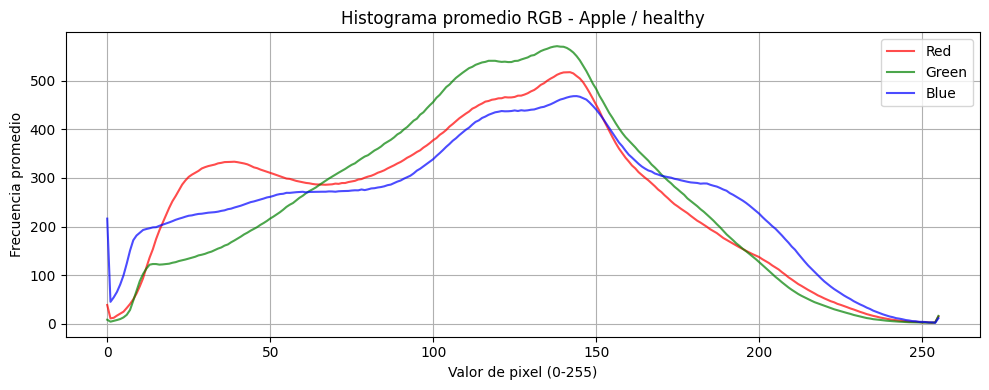

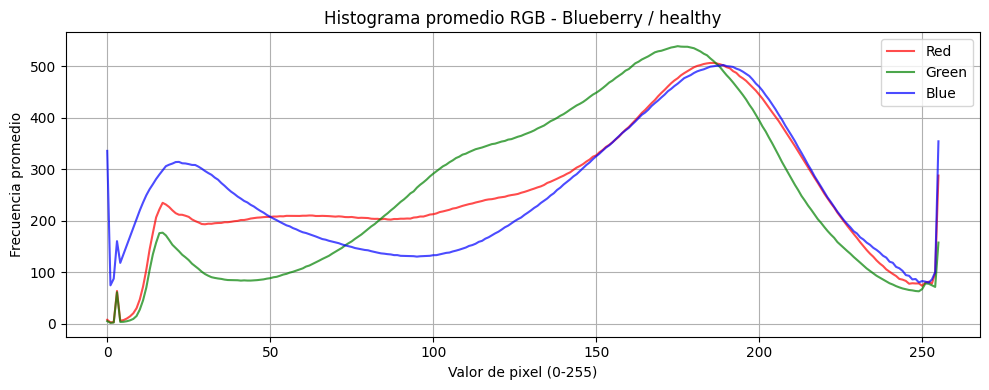

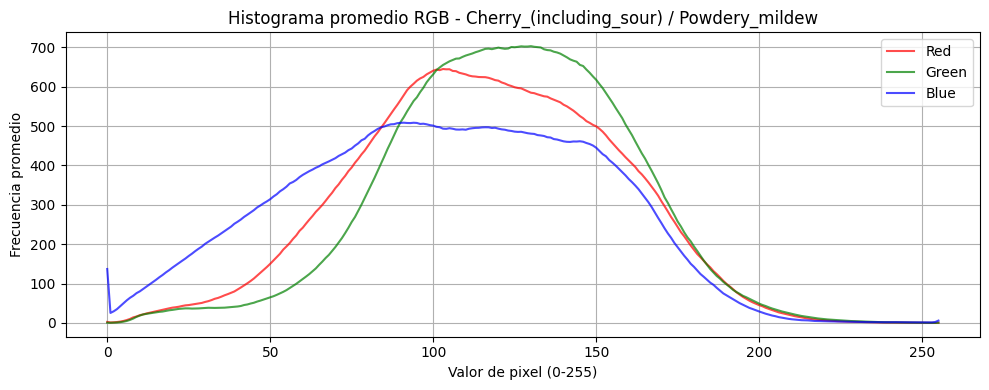

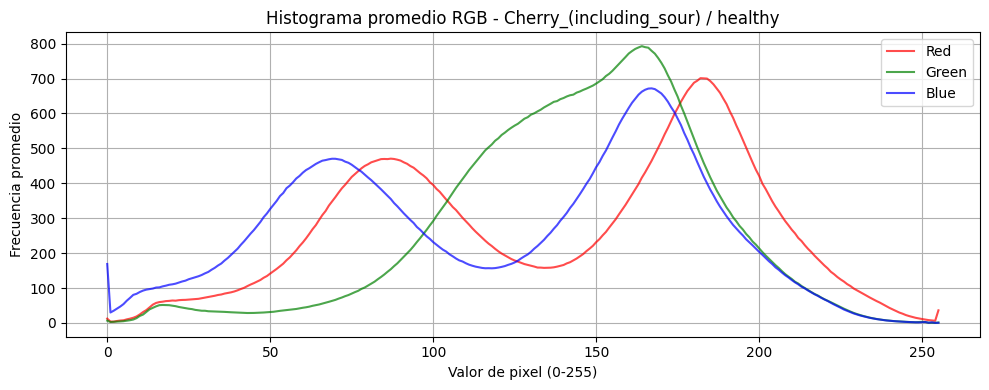

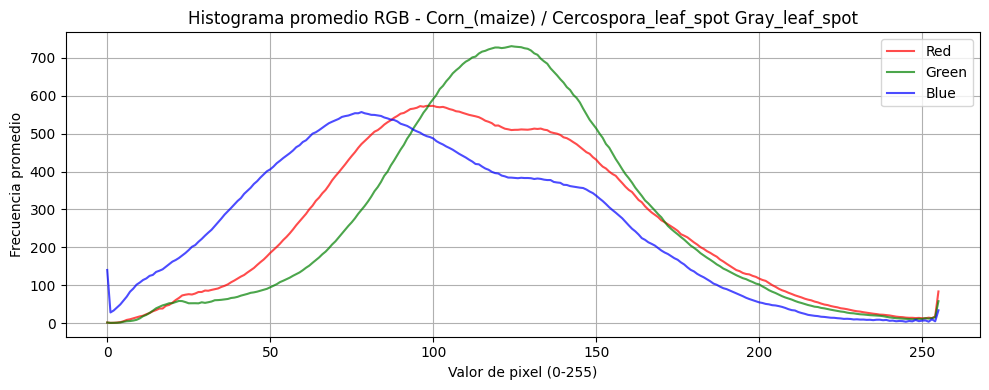

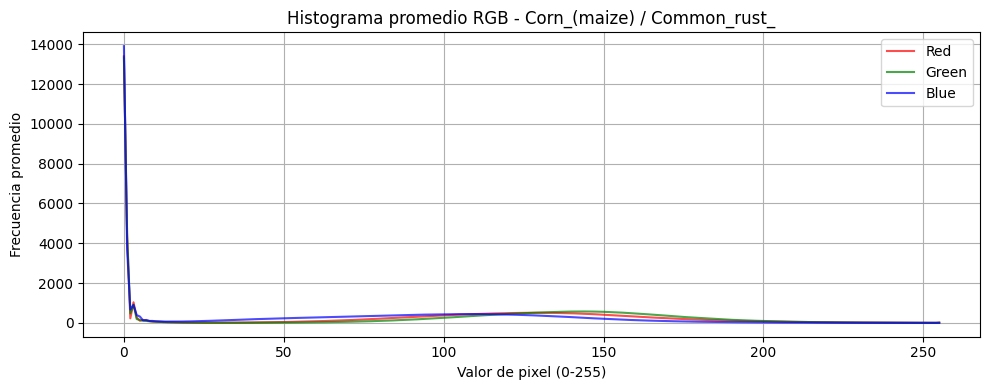

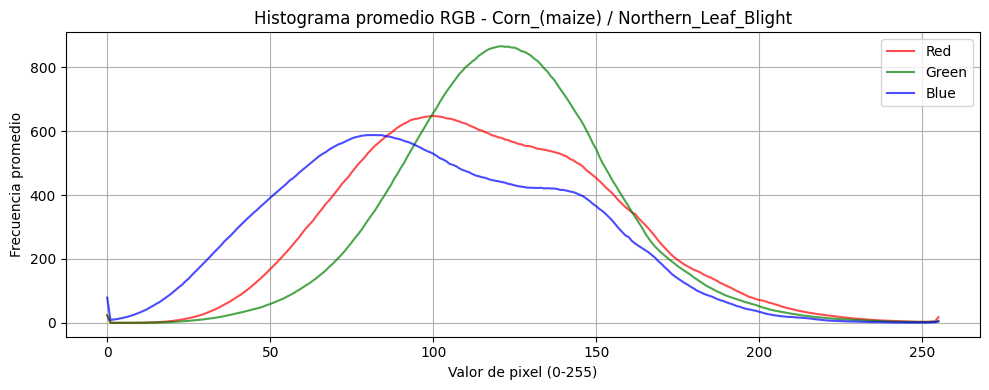

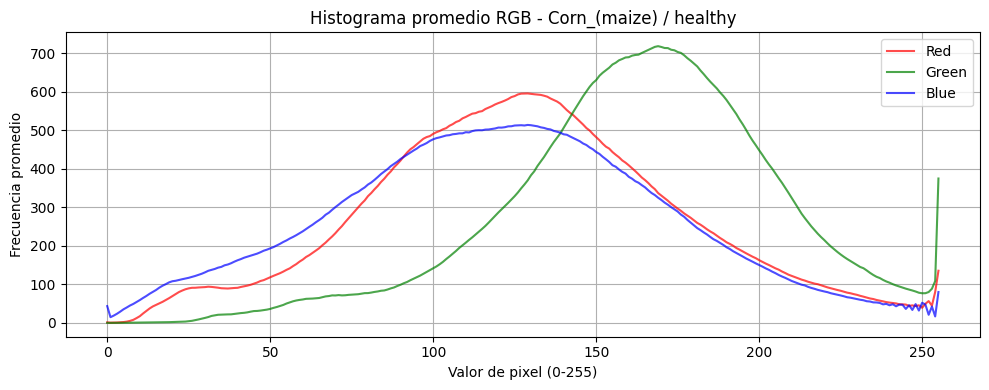

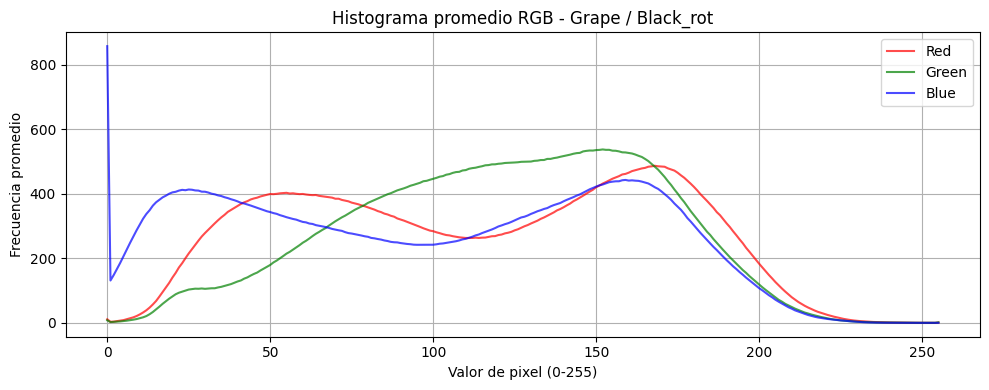

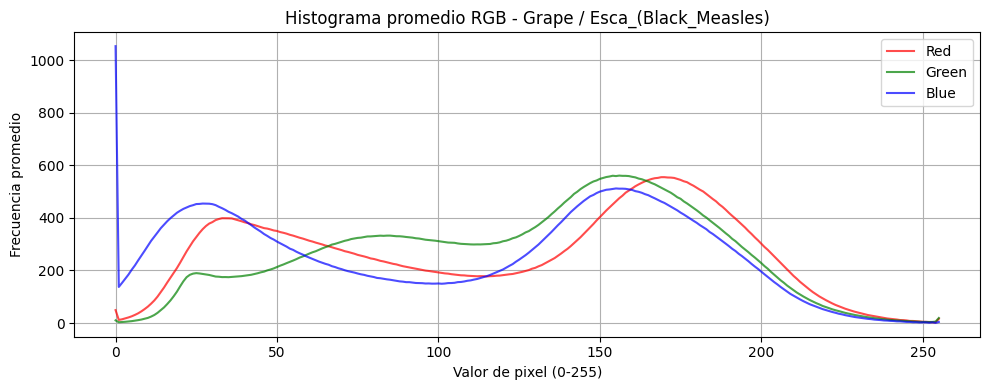

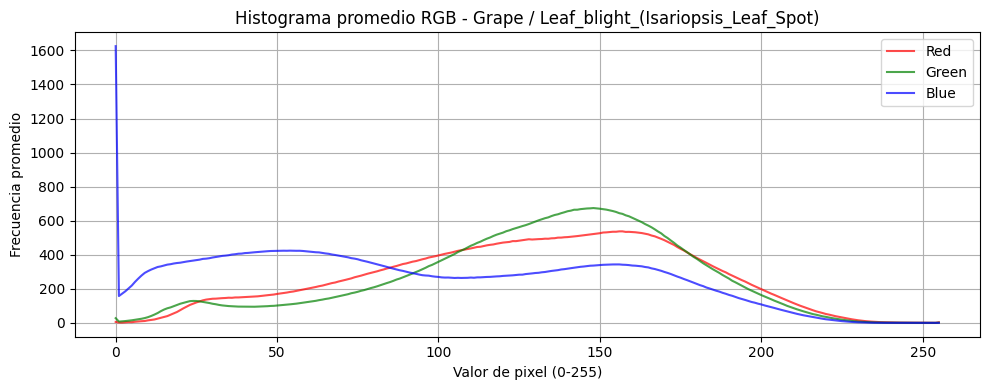

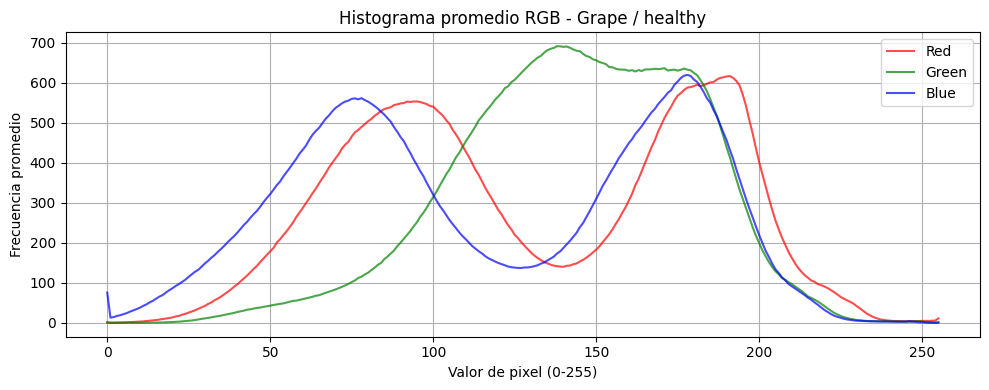

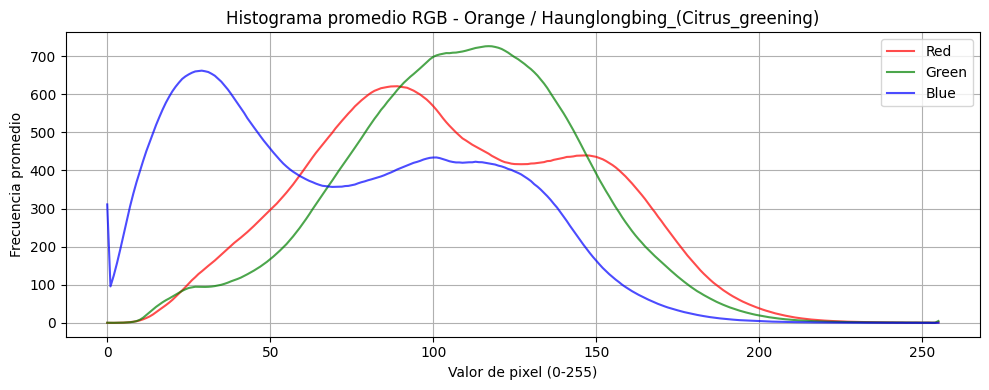

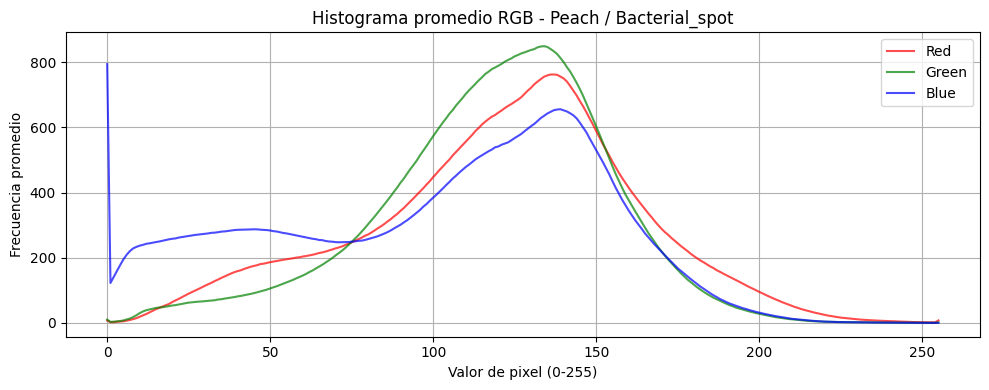

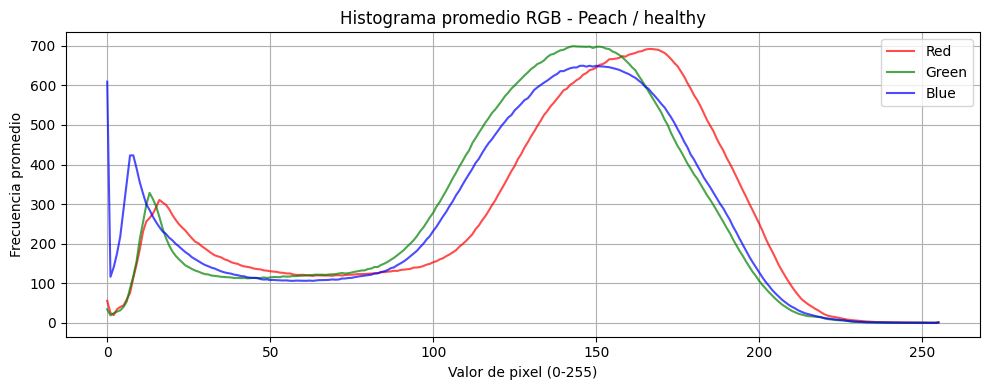

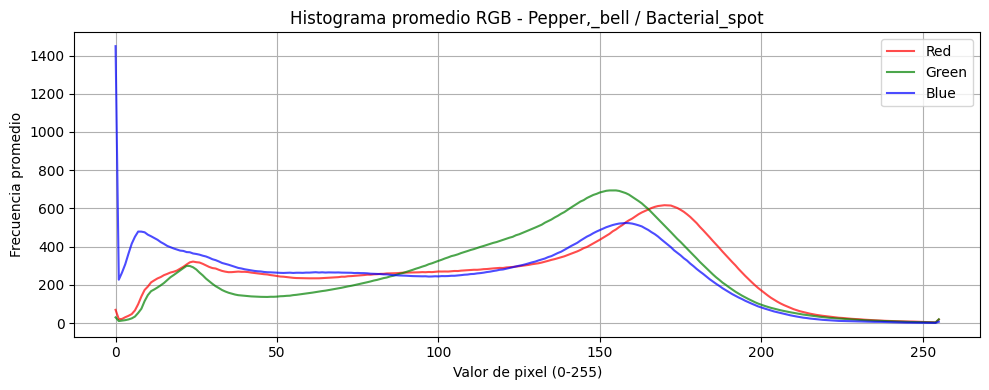

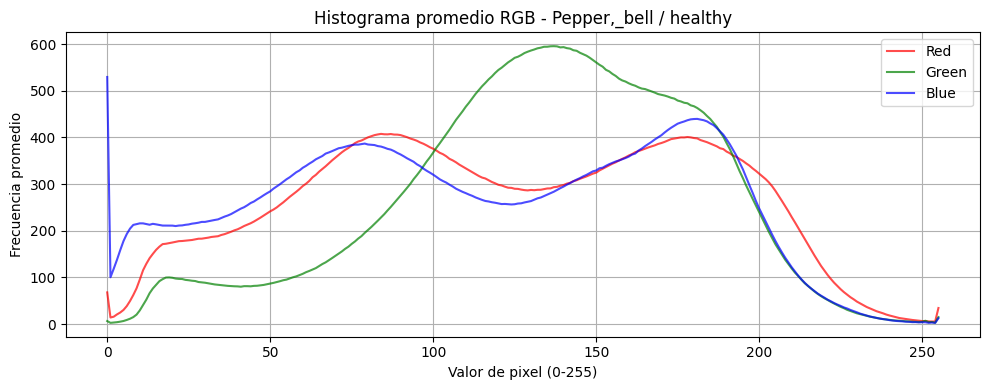

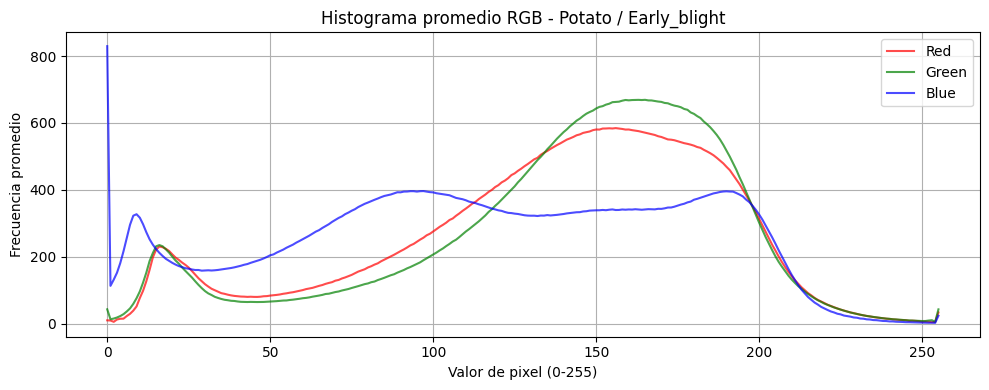

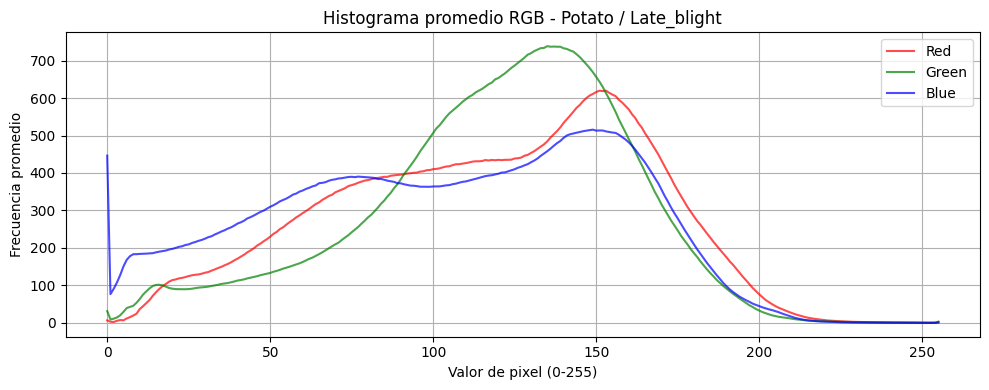

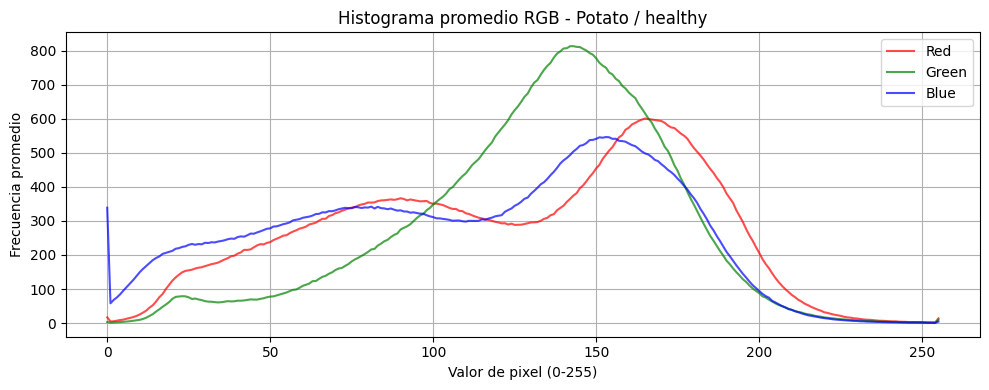

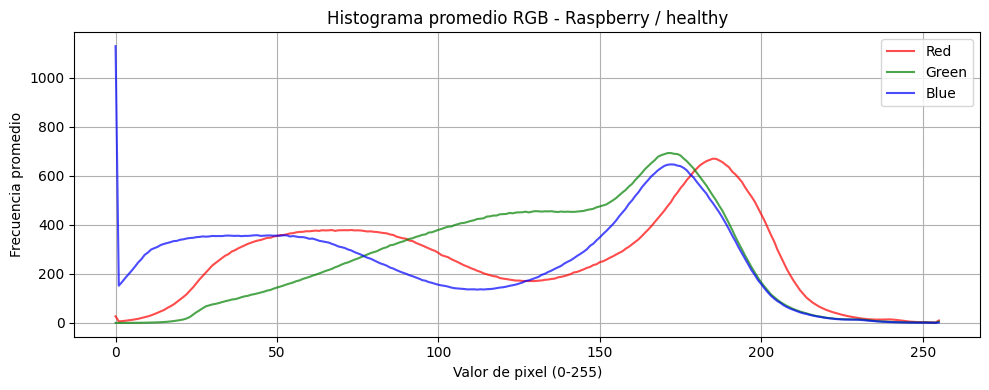

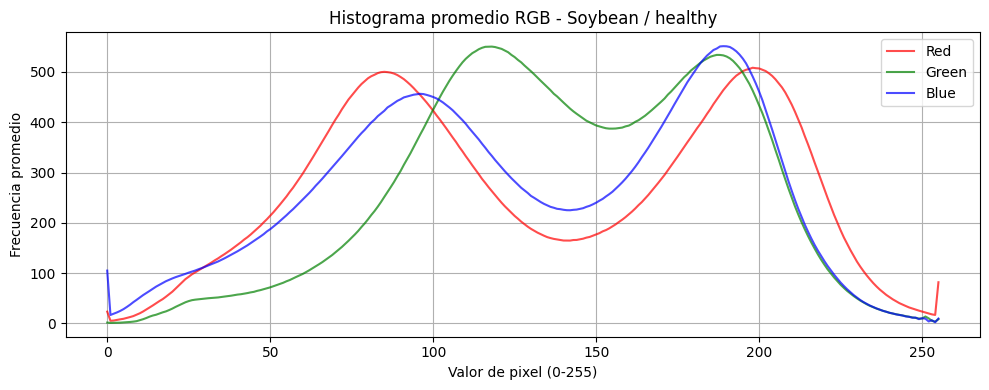

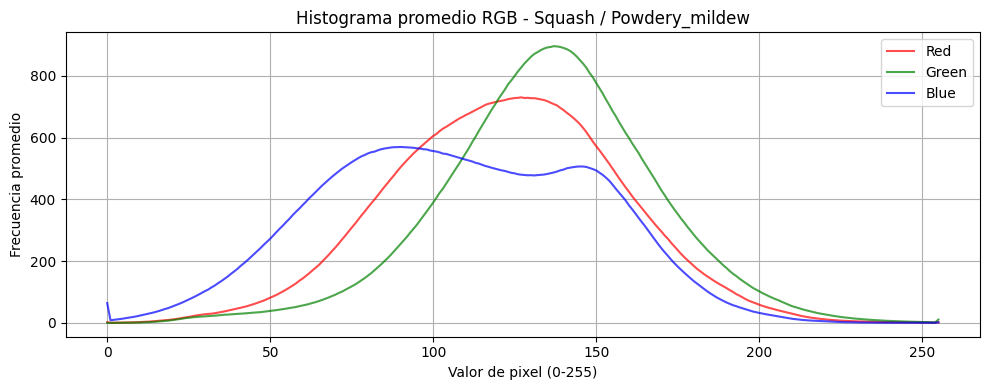

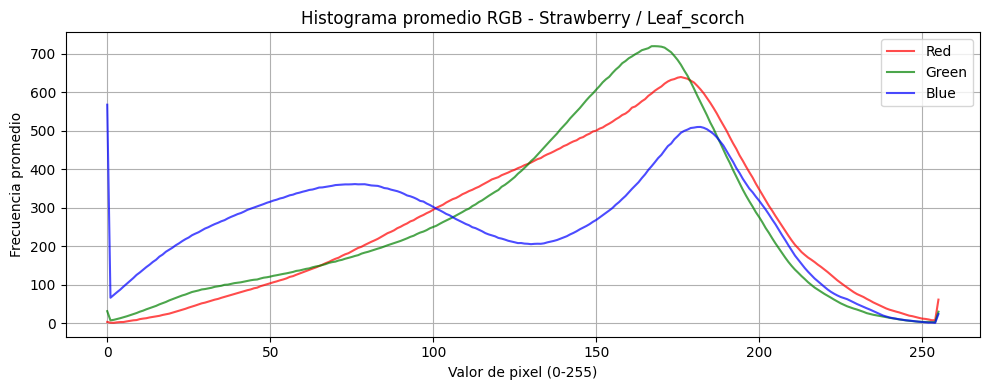

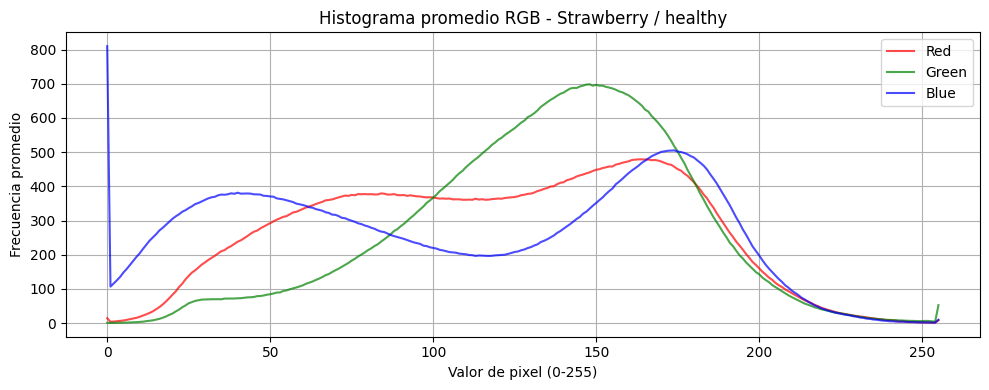

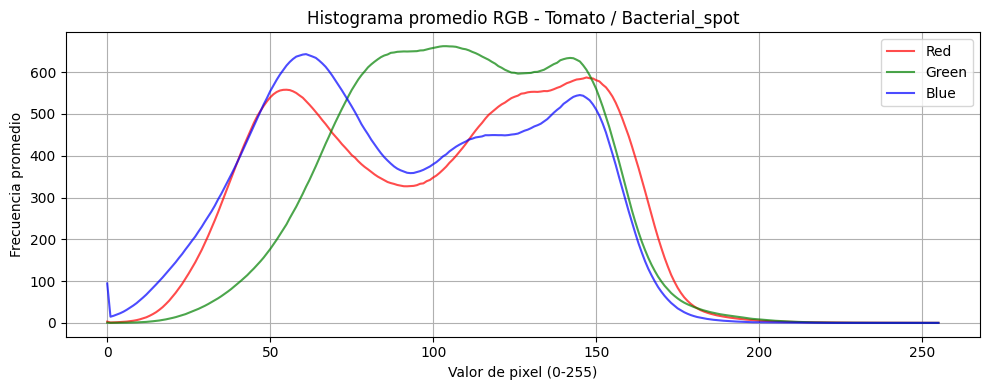

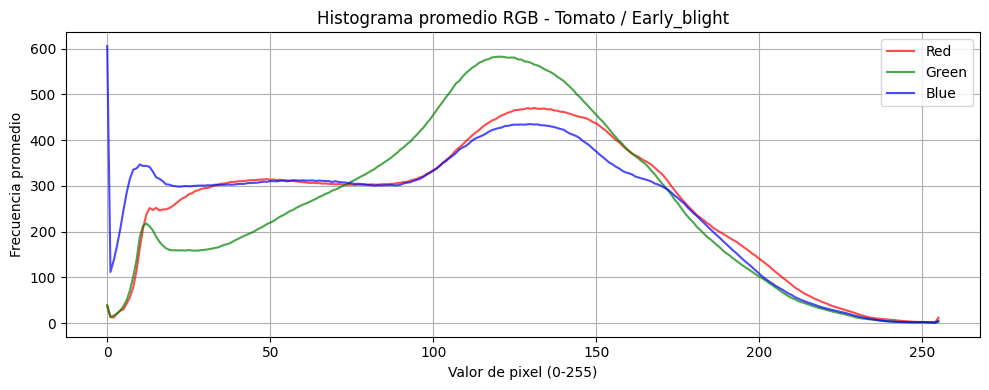

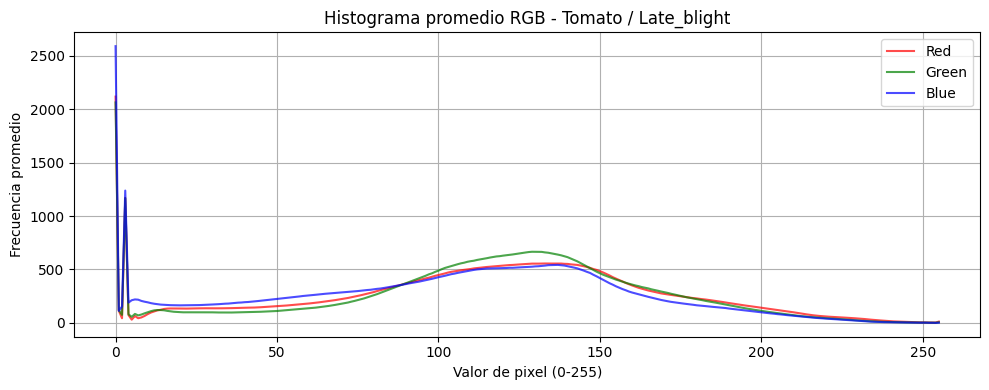

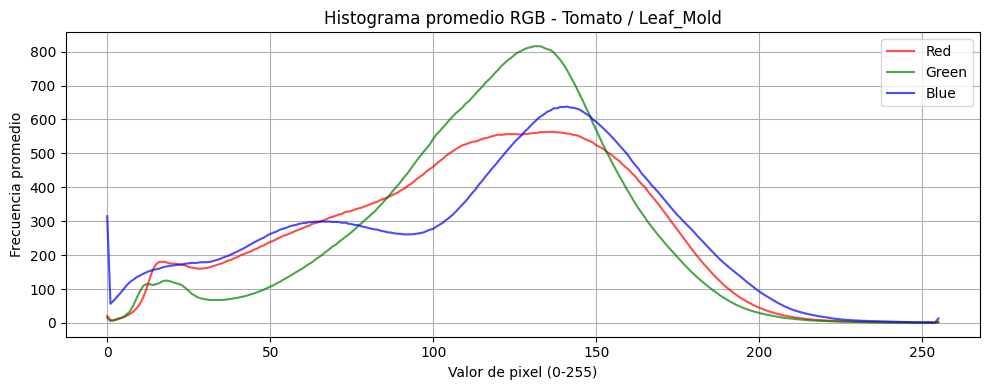

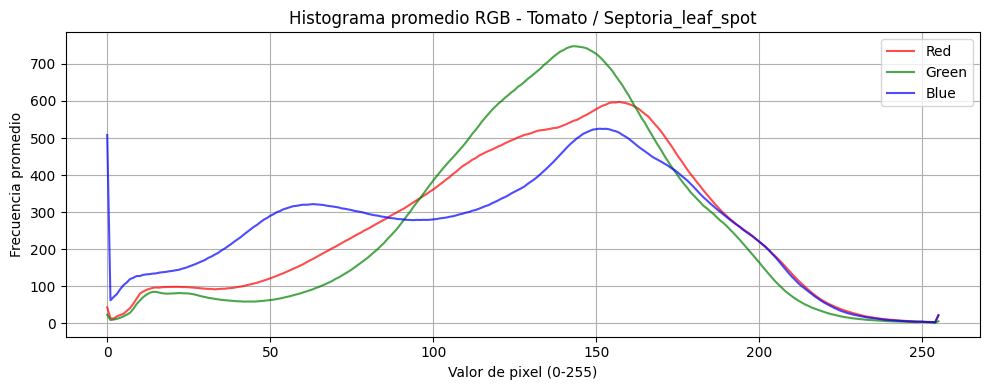

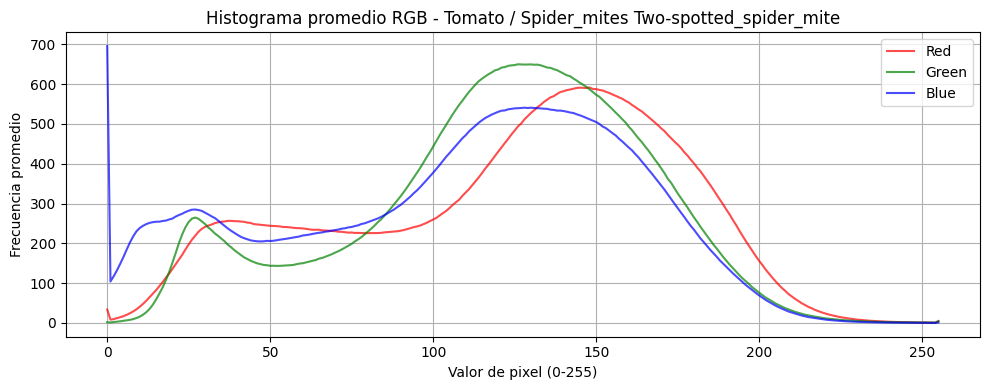

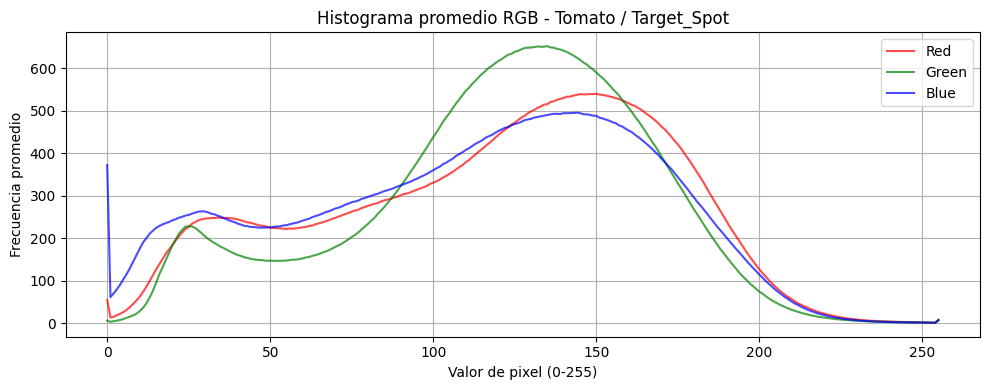

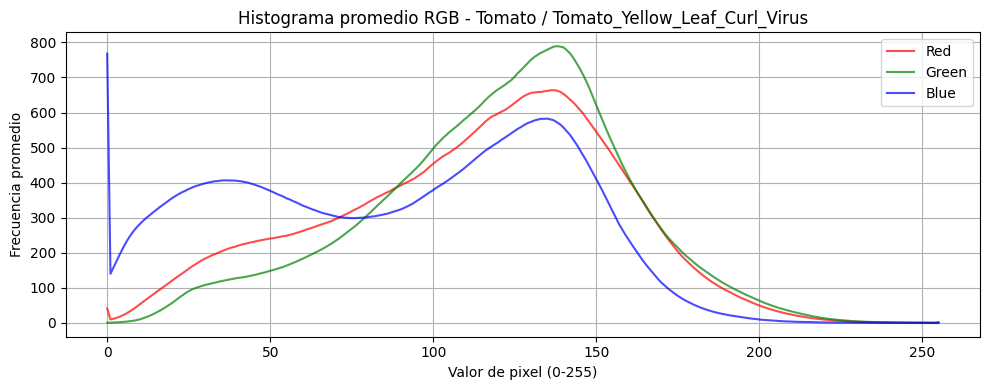

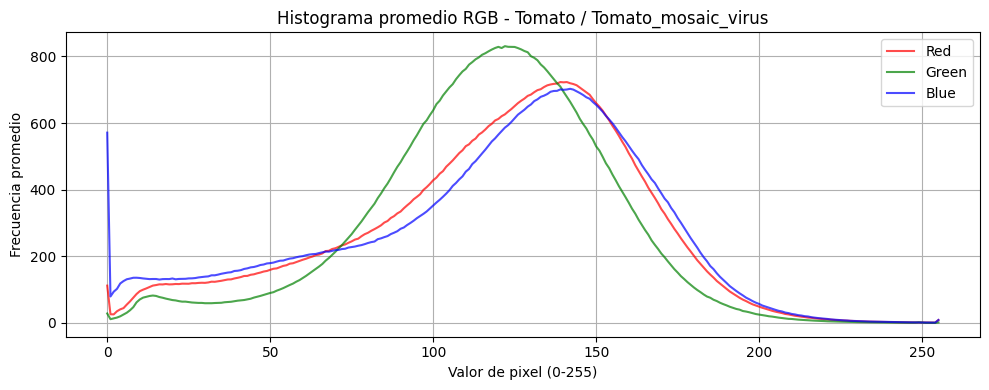

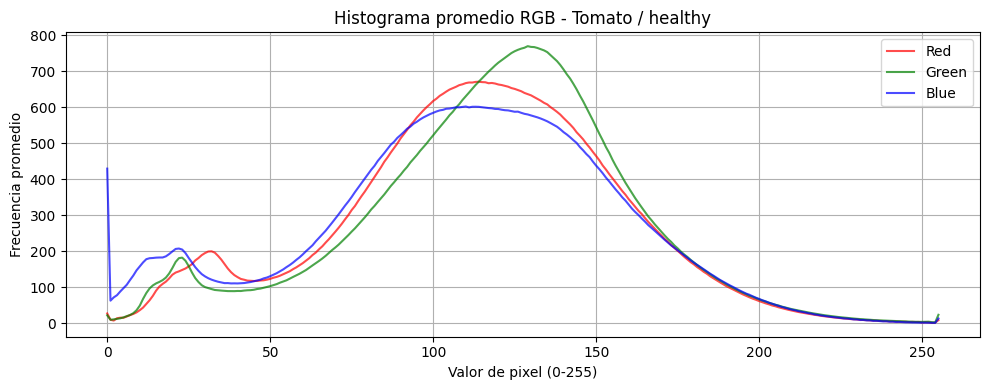

In [56]:
# Paso 5: Graficar con colores RGB
for (group, tag), (avg_r, avg_g, avg_b) in average_histograms.items():
    plt.figure(figsize=(10, 4))
    plt.title(f"Histograma promedio RGB - {group} / {tag}")
    plt.plot(avg_r, label="Red", color='red', alpha=0.7)
    plt.plot(avg_g, label="Green", color='green', alpha=0.7)
    plt.plot(avg_b, label="Blue", color='blue', alpha=0.7)
    plt.xlabel("Valor de pixel (0-255)")
    plt.ylabel("Frecuencia promedio")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Split dataset

In [57]:
def split_data(df,
               target_column='class',
               test_size=0.20,
               validation_size=0.0, # Por defecto no define un conjunto de validación
               random_state=42,     # Semilla para reproducibilidad
               split_column_name='split'):
    """
    Añade una columna al DataFrame indicando la división (train/test/validation).

    Realiza una división estratificada para mantener el balance de clases.

    Args:
        df (pd.DataFrame): DataFrame de entrada con al menos la columna 'target_column'.
        target_column (str): Nombre de la columna que contiene las etiquetas de clase
                             para la estratificación (ej: 'class').
        test_size (float): Proporción del dataset a incluir en el conjunto de test (ej: 0.20).
        validation_size (float): Proporción del dataset a incluir en el conjunto de validación.
                                 La proporción de entrenamiento será 1.0 - test_size - validation_size.
                                 Si es 0.0, solo se crearán conjuntos de train y test.
        random_state (int): Semilla para el generador de números aleatorios para asegurar
                            divisiones reproducibles.
        split_column_name (str): Nombre de la nueva columna que contendrá las etiquetas
                                 'train', 'test' o 'validation'.

    Returns:
        pd.DataFrame: El DataFrame original con la nueva columna 'split_column_name'.

    Raises:
        ValueError: Si test_size + validation_size >= 1.0, o si target_column no existe.
        ImportError: Si scikit-learn no está instalado.
    """
    if target_column not in df.columns:
        raise ValueError(f"La columna objetivo '{target_column}' no se encuentra en el DataFrame.")

    if not isinstance(test_size, float) or not (0.0 <= test_size < 1.0):
         raise ValueError("test_size debe ser un float entre 0.0 y 1.0.")

    if not isinstance(validation_size, float) or not (0.0 <= validation_size < 1.0):
         raise ValueError("validation_size debe ser un float entre 0.0 y 1.0.")

    if test_size + validation_size >= 1.0:
        raise ValueError("La suma de test_size y validation_size debe ser menor que 1.0.")

    # Crear la nueva columna inicializada (opcional, pero ayuda a la claridad)
    df[split_column_name] = 'unassigned'

    # Extraer etiquetas para estratificación
    labels = df[target_column]
    indices = df.index # Usaremos los índices para la división

    # --- Lógica de División ---

    # Caso 1: División en Train / Test (sin Validación)
    if validation_size == 0.0:
        train_indices, test_indices = train_test_split(
            indices,
            test_size=test_size,
            random_state=random_state,
            stratify=labels # Permite mantener el balance de clases
        )
        df.loc[train_indices, split_column_name] = 'train'
        df.loc[test_indices, split_column_name] = 'test'
        logging.info(f"División completada: Train ({1-test_size:.1%}), Test ({test_size:.1%}). Estratificada por '{target_column}'.")

    # Caso 2: División en Train / Test / Validation
    else:
        # Paso 1: Dividir en (Train + Validation) y Test
        remaining_indices, test_indices = train_test_split(
            indices,
            test_size=test_size, # Tamaño final del conjunto de test
            random_state=random_state,
            stratify=labels
        )

        # Calcular el tamaño relativo de validación respecto al conjunto restante (Train + Validation)
        # Ejemplo: test=0.2, val=0.1 -> Total 0.3. Restante 0.7. val_rel = 0.1 / 0.7 = 0.142...
        # train_test_split tomará el 14.2% del 70% restante, lo que equivale al 10% del total original.
        relative_val_size = validation_size / (1.0 - test_size)

        # Obtener las etiquetas correspondientes SOLO al conjunto restante para la segunda estratificación
        remaining_labels = df.loc[remaining_indices, target_column]

        # Paso 2: Dividir el conjunto restante en Train y Validation
        train_indices, validation_indices = train_test_split(
            remaining_indices, # Dividir solo los índices restantes
            test_size=relative_val_size, # Tamaño relativo calculado
            random_state=random_state,   # Usar la misma semilla para consistencia
            stratify=remaining_labels    # Estratificar usando las etiquetas restantes
        )

        # Asignar etiquetas de división al DataFrame original
        df.loc[train_indices, split_column_name] = 'train'
        df.loc[validation_indices, split_column_name] = 'valid'
        df.loc[test_indices, split_column_name] = 'test'

        train_actual_prop = len(train_indices) / len(df)
        val_actual_prop = len(validation_indices) / len(df)
        test_actual_prop = len(test_indices) / len(df)
        logging.info(f"División completada: Train ({train_actual_prop:.1%}), Validation ({val_actual_prop:.1%}), Test ({test_actual_prop:.1%}). Estratificada por '{target_column}'.")

    return df

In [58]:
df_split = split_data(df.copy(), # Usar .copy() para no modificar el original directamente aquí
                                target_column='class',
                                test_size=0.2,
                                random_state=42) # Usa la semilla que prefieras

In [59]:
df_split

image_path  \
id                             
0      Strawberry___healthy/   
1      Strawberry___healthy/   
2      Strawberry___healthy/   
3      Strawberry___healthy/   
4      Strawberry___healthy/   
...                      ...   
54300     Soybean___healthy/   
54301     Soybean___healthy/   
54302     Soybean___healthy/   
54303     Soybean___healthy/   
54304     Soybean___healthy/   

                                                filename  \
id                                                         
0      8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1...   
1      b8e9ed27-8e37-4214-9206-f8c0ef21cf4d___RS_HL 4...   
2      abdd34a0-ab02-41e0-95a3-a014ab863ec2___RS_HL 1...   
3      d1aee44a-b6bb-45b9-b7b6-5d553add8fd1___RS_HL 2...   
4      3d28c3ea-8419-4e09-addd-211e3828e39f___RS_HL 1...   
...                                                  ...   
54300  57c18b39-2a33-471f-91eb-a9ba4ddabc7b___RS_HL 6...   
54301  4fdc663e-a8ea-4d8a-801b-ef18ad192661___RS_HL 6...   
54302  df807f13-078b-4a6a-9c23-e43e540ecdc2___RS_HL 5...   
54303  60bf9858-951a-4b56-906e-3c1b336973ba___RS_HL 4...   
54304  c7f4b7b2-b13c-476e-a936-c91ce39749a3___RS_HL 6...   

                      class       group      tag  \
id                                                 
0      Strawberry___healthy  Strawberry  healthy   
1      Strawberry___healthy  Strawberry  healthy   
2      Strawberry___healthy  Strawberry  healthy   
3      Strawberry___healthy  Strawberry  healthy   
4      Strawberry___healthy  Strawberry  healthy   
...                     ...         ...      ...   
54300     Soybean___healthy     Soybean  healthy   
54301     Soybean___healthy     Soybean  healthy   
54302     Soybean___healthy     Soybean  healthy   
54303     Soybean___healthy     Soybean  healthy   
54304     Soybean___healthy     Soybean  healthy   

                                               full_path  split  
id                                                               
0      /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  
1      /Users/ctalamilla/.cache/kagglehub/datasets/ab...   test  
2      /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  
3      /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  
4      /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  
...                                                  ...    ...  
54300  /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  
54301  /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  
54302  /Users/ctalamilla/.cache/kagglehub/datasets/ab...   test  
54303  /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  
54304  /Users/ctalamilla/.cache/kagglehub/datasets/ab...  train  

[54305 rows x 7 columns]

In [60]:
df_split['split'].value_counts()

split
train    43444
test     10861
Name: count, dtype: int64

In [61]:
# Guardamos el dataframe como .CSV para evitar realizar este proceso nuevamente
df_split.to_csv('dataframe_splitted.csv')

In [62]:
print("\n--- Conteo de muestras por 'split' ---")
print(df_split['split'].value_counts(normalize=True)) # normalize=True muestra proporciones

print("\n--- Verificación del Balance de Clases por 'split' ---")

# Comprobar si las proporciones de clases son similares en cada split
print(df_split.groupby('split')['class'].value_counts(normalize=True))


--- Conteo de muestras por 'split' ---
split
train    0.8
test     0.2
Name: proportion, dtype: float64

--- Verificación del Balance de Clases por 'split' ---
split  class                                   
test   Orange___Haunglongbing_(Citrus_greening)    0.101464
       Tomato___Tomato_Yellow_Leaf_Curl_Virus      0.098610
       Soybean___healthy                           0.093730
       Peach___Bacterial_spot                      0.042353
       Tomato___Bacterial_spot                     0.039131
                                                     ...   
train  Tomato___Tomato_mosaic_virus                0.006859
       Raspberry___healthy                         0.006836
       Peach___healthy                             0.006629
       Apple___Cedar_apple_rust                    0.005064
       Potato___healthy                            0.002808
Name: proportion, Length: 76, dtype: float64


## Construccion de Carpatas para Pytorch

In [63]:
import os, re

# Busca la carpeta raíz del dataset en el directorio donde fue descargado
def find_path(folder):
    match = re.search(fr"^(.*?)/{folder}/", DATASET_PATH)
    if match:
        prefix = match.group(1)
        path = os.path.join(prefix, f"{folder}/")
        return path
    else:
        print(f'No se ha podido encontrar la carpeta "{folder}" en {DATASET_PATH}')
        return None

In [64]:
find_path("plantvillage-dataset")

'/Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/'

In [66]:
# Guarda directorio del dataset dividido
path = find_path("plantvillage-dataset")
DATASETS_ROOT = path
SPLITTED_PATH = f"{path}splitted/" if path else None
SPLITTED_PATH

'/Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/splitted/'

In [67]:
splits = df_split['split'].value_counts().index.tolist()
splits

['train', 'test']

In [70]:
def create_ignore_function(df, train_label, filename_col='filename'):
    """
    Crea y devuelve la función 'ignore_files' que tiene acceso al DataFrame
    y sabe qué archivos mantener.
    """
    # Crea un conjunto (set) con los nombres de archivo que SÍ queremos copiar (ej: split == 'train')
    # Usa este conjunto para hacer la búsqueda de forma mucho más rápida
    files_to_keep = set(df[df['split'] == train_label][filename_col])
    #print(f"Archivos a mantener (split='{train_label}'): {files_to_keep}") # Debugging

    def ignore_files(current_dir, files_in_current_dir):
        """
        Función que será llamada por shutil.copytree.
        Decide qué archivos/directorios ignorar en el directorio actual.
        """
        ignore_list = []
        for item in files_in_current_dir:
            # Construye la ruta completa para verificar si es archivo o directorio
            full_path = os.path.join(current_dir, item)

            # Aplicar la lógica de ignorar SOLO los ARCHIVOS de la lista
            if os.path.isfile(full_path):
                # Si el nombre del archivo NO está en el conjunto de archivos a mantener,
                # entonces lo agrega a la lista de ignorados.
                if item not in files_to_keep:
                    # print(f"Ignorando archivo: {item} (en {current_dir})") # Debugging
                    ignore_list.append(item)

        # print(f"Directorio: {current_dir}, Ignorando: {ignore_list}") # Debugging
        return ignore_list

    # Devuelve la función 'ignore_files' configurada
    return ignore_files

In [71]:
verfication = True # Ejecuta el proceso de verificación (punto 2)

print(f"Se inicia proceso de copiado del dataset…")
total_files = len(df_split) # Total de archivos del dataset
print(f" - Total de archivos en el dataset: {total_files}")

# Realiza el proceso de copiado de archivos para cada split
succeeded_process = True
for split in splits:
    # Crea las rutas de origen y destino
    # (Ejemplo: 'train', 'test', 'valid')
    print(f"\n\nIniciando proceso para '{split}' split …")
    source_folder = f'{ROOT_DIR}/'
    destination_folder = f'{SPLITTED_PATH}{split}/'
    total_split = len(df_split[df_split['split'] == split]) # Total de archivos del split
    if dataset_already_exists(destination_folder): # Verifica si el directorio existe y está vacío
        print("  ⨯ El directorio ya existe y contiene archivos, a petición del usuario se omite el proceso de copiado.")
        continue # Si el directorio ya existe, no se hace nada+
    else:
        print(f"🔄 Procesando split '{split.upper()}' ({(total_split/total_files*100):.2f}):")
        print(f"  - Total de archivos a copiar: {total_split}")
    succeeded = False

    try:
        print(f"1. Creando estructura de subcarpetas:")
        # 1. Crea la función para ignorar específica para el split a procesar
        ignore_function = create_ignore_function(df_split, train_label=split, filename_col='filename')
        print(f"    ✔ Función de filtro creada para el split ")

        # 2. Con copytree copia todo el "árbol" de directorios (careptas y subcarpetas)
        # Fitrando con ignore_function todos aquellos archivos que no pertenecen al split deseado
        print(f"    ∞ Copiando contenido del dataset (puede demorar hasta un minuto).")
        shutil.copytree(source_folder, destination_folder, ignore=ignore_function)
        print(f"    ✔ Proceso de copiado del split finalizado.")

        if verfication:
            # Verifica qué se haya copiado adecuadamente (opcional pero útil)
            print(f"2. Se inicia proceso de verificación…")
            copied_files = []
            for root, dirs, files_in_dest in os.walk(destination_folder):
                for name in files_in_dest:
                    copied_files.append(os.path.join(os.path.relpath(root, destination_folder), name).replace('\\', '/')) # Normalizar path
                    #print(f"  - {os.path.join(root, name)}") # Debuggin
            print(f"    ✔ Se crearon un total de {len(os.listdir(destination_folder))} carpetas (para las clases).")
            print(f"    ✔ Se copiaron un total de {len(copied_files)} archivos ({len(copied_files)/total_split*100:.2f}%)")
            # Agregar confirmación de igualdad cantidad split == copiados
            if len(copied_files) == total_split:
                print(f"✅ Se completó satisfactoriamente el subproceso de copiado para el split.\n")
                succeeded = True
            else:
                print(f"❌ Error: No se pudo copiar correctamente el split '{split.upper()}'\n")
                succeeded = False
        else:
            succeeded = True # Si la verificación está desactivada, se asume que el proceso fue exitoso

    except FileExistsError:
        print(f"Error: La carpeta de destino '{destination_folder}' ya existe.\n")
        pass
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}\n")

    succeeded_process *= succeeded # Actualiza el estado del proceso
    # (Sólo es 'True' si todos los splits se copian correctamente)

if succeeded_process:
    print("\n\n🌟 El proceso de copiado del dataset ha finalizado con éxito.\n")
else:
    print("\n\n🚫 No se pudo completar satisfactoriamente el proceso de copiado del dataset.\nVerificar que se haya completado la eliminación de las carpetas.\n")

Se inicia proceso de copiado del dataset…
 - Total de archivos en el dataset: 54305


Iniciando proceso para 'train' split …
🔄 Procesando split 'TRAIN' (80.00):
  - Total de archivos a copiar: 43444
1. Creando estructura de subcarpetas:
    ✔ Función de filtro creada para el split 
    ∞ Copiando contenido del dataset (puede demorar hasta un minuto).
    ✔ Proceso de copiado del split finalizado.
2. Se inicia proceso de verificación…
    ✔ Se crearon un total de 38 carpetas (para las clases).
    ✔ Se copiaron un total de 43444 archivos (100.00%)
✅ Se completó satisfactoriamente el subproceso de copiado para el split.



Iniciando proceso para 'test' split …
🔄 Procesando split 'TEST' (20.00):
  - Total de archivos a copiar: 10861
1. Creando estructura de subcarpetas:
    ✔ Función de filtro creada para el split 
    ∞ Copiando contenido del dataset (puede demorar hasta un minuto).
    ✔ Proceso de copiado del split finalizado.
2. Se inicia proceso de verificación…
    ✔ Se crearon un t

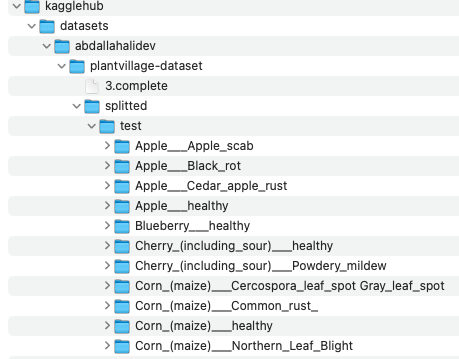

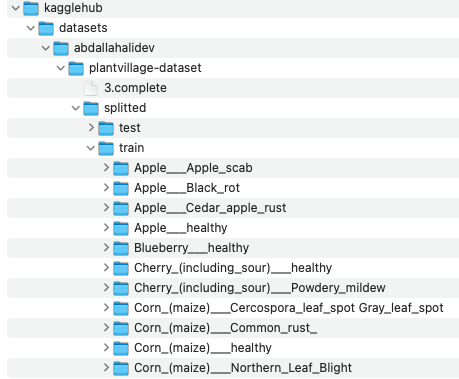

In [72]:
ROOT_DIR, DATASETS_ROOT, DATASET_PATH, SPLITTED_PATH

('/Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color',
 '/Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/',
 '/Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3',
 '/Users/ctalamilla/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/splitted/')